### Presentation of Bus Routes Elevation and Grade

Lynna Truong

6/4/2020

We need the elevation of transit routes to be able to perform a force calculations on the buses. With the force calculations, we will be able to calculate the load of the battery. This allows us to predit when the batteries on hybrid buses will not be useable for buses. Last quarter, I learned how to trace routes and add elevation data to points on the route on ArcMaps. This quarter, I used the data obtained from last quarter and plotted the elevation and grade vs distance travelled to gain a better understanding of the bus's travel route.

Below is the code used to generate these plots, using route 45 as an example.

In [2]:
# this allows python to gather data from our "data" folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [3]:
# import different packages

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter as sf
from scipy.stats import linregress
from scipy.optimize import curve_fit
from shapely.geometry import mapping

import route_dynamics.route_elevation.base as base
from route_dynamics.route_visualizer import visualizer as vis

### Gathering Data

In [4]:
# pulls data (you need all files that are named rt#_pts in the same folder)

route_pts = '../data/rt45_pts.shp'

# reads the .shp file

route = gpd.read_file(route_pts)

# shows route number, elevation, and distance at each point in the route

x = []

for i in route.index:
    
    x.append(i*6) # 6 is to indicate points are 6 ft apart
    

route['length'] = x
route.head(10)

,Id,ORIG_FID,SHAPE_Leng,Z,geometry,length
0,0,1,0.00512,64.905567,POINT (-122.30390 47.65104),0
1,0,1,0.00512,65.936684,POINT (-122.30391 47.65102),6
2,0,1,0.00512,66.115446,POINT (-122.30393 47.65099),12
3,0,1,0.00512,77.554545,POINT (-122.30394 47.65097),18
4,0,1,0.00512,65.413237,POINT (-122.30395 47.65095),24
5,0,1,0.00512,65.474908,POINT (-122.30396 47.65093),30
6,0,1,0.00512,65.620721,POINT (-122.30397 47.65091),36
7,0,1,0.00512,66.906976,POINT (-122.30398 47.65089),42
8,0,1,0.00512,65.769537,POINT (-122.30399 47.65086),48
9,0,1,0.00512,67.450205,POINT (-122.30401 47.65084),54


### Elevation Plot Before Filter

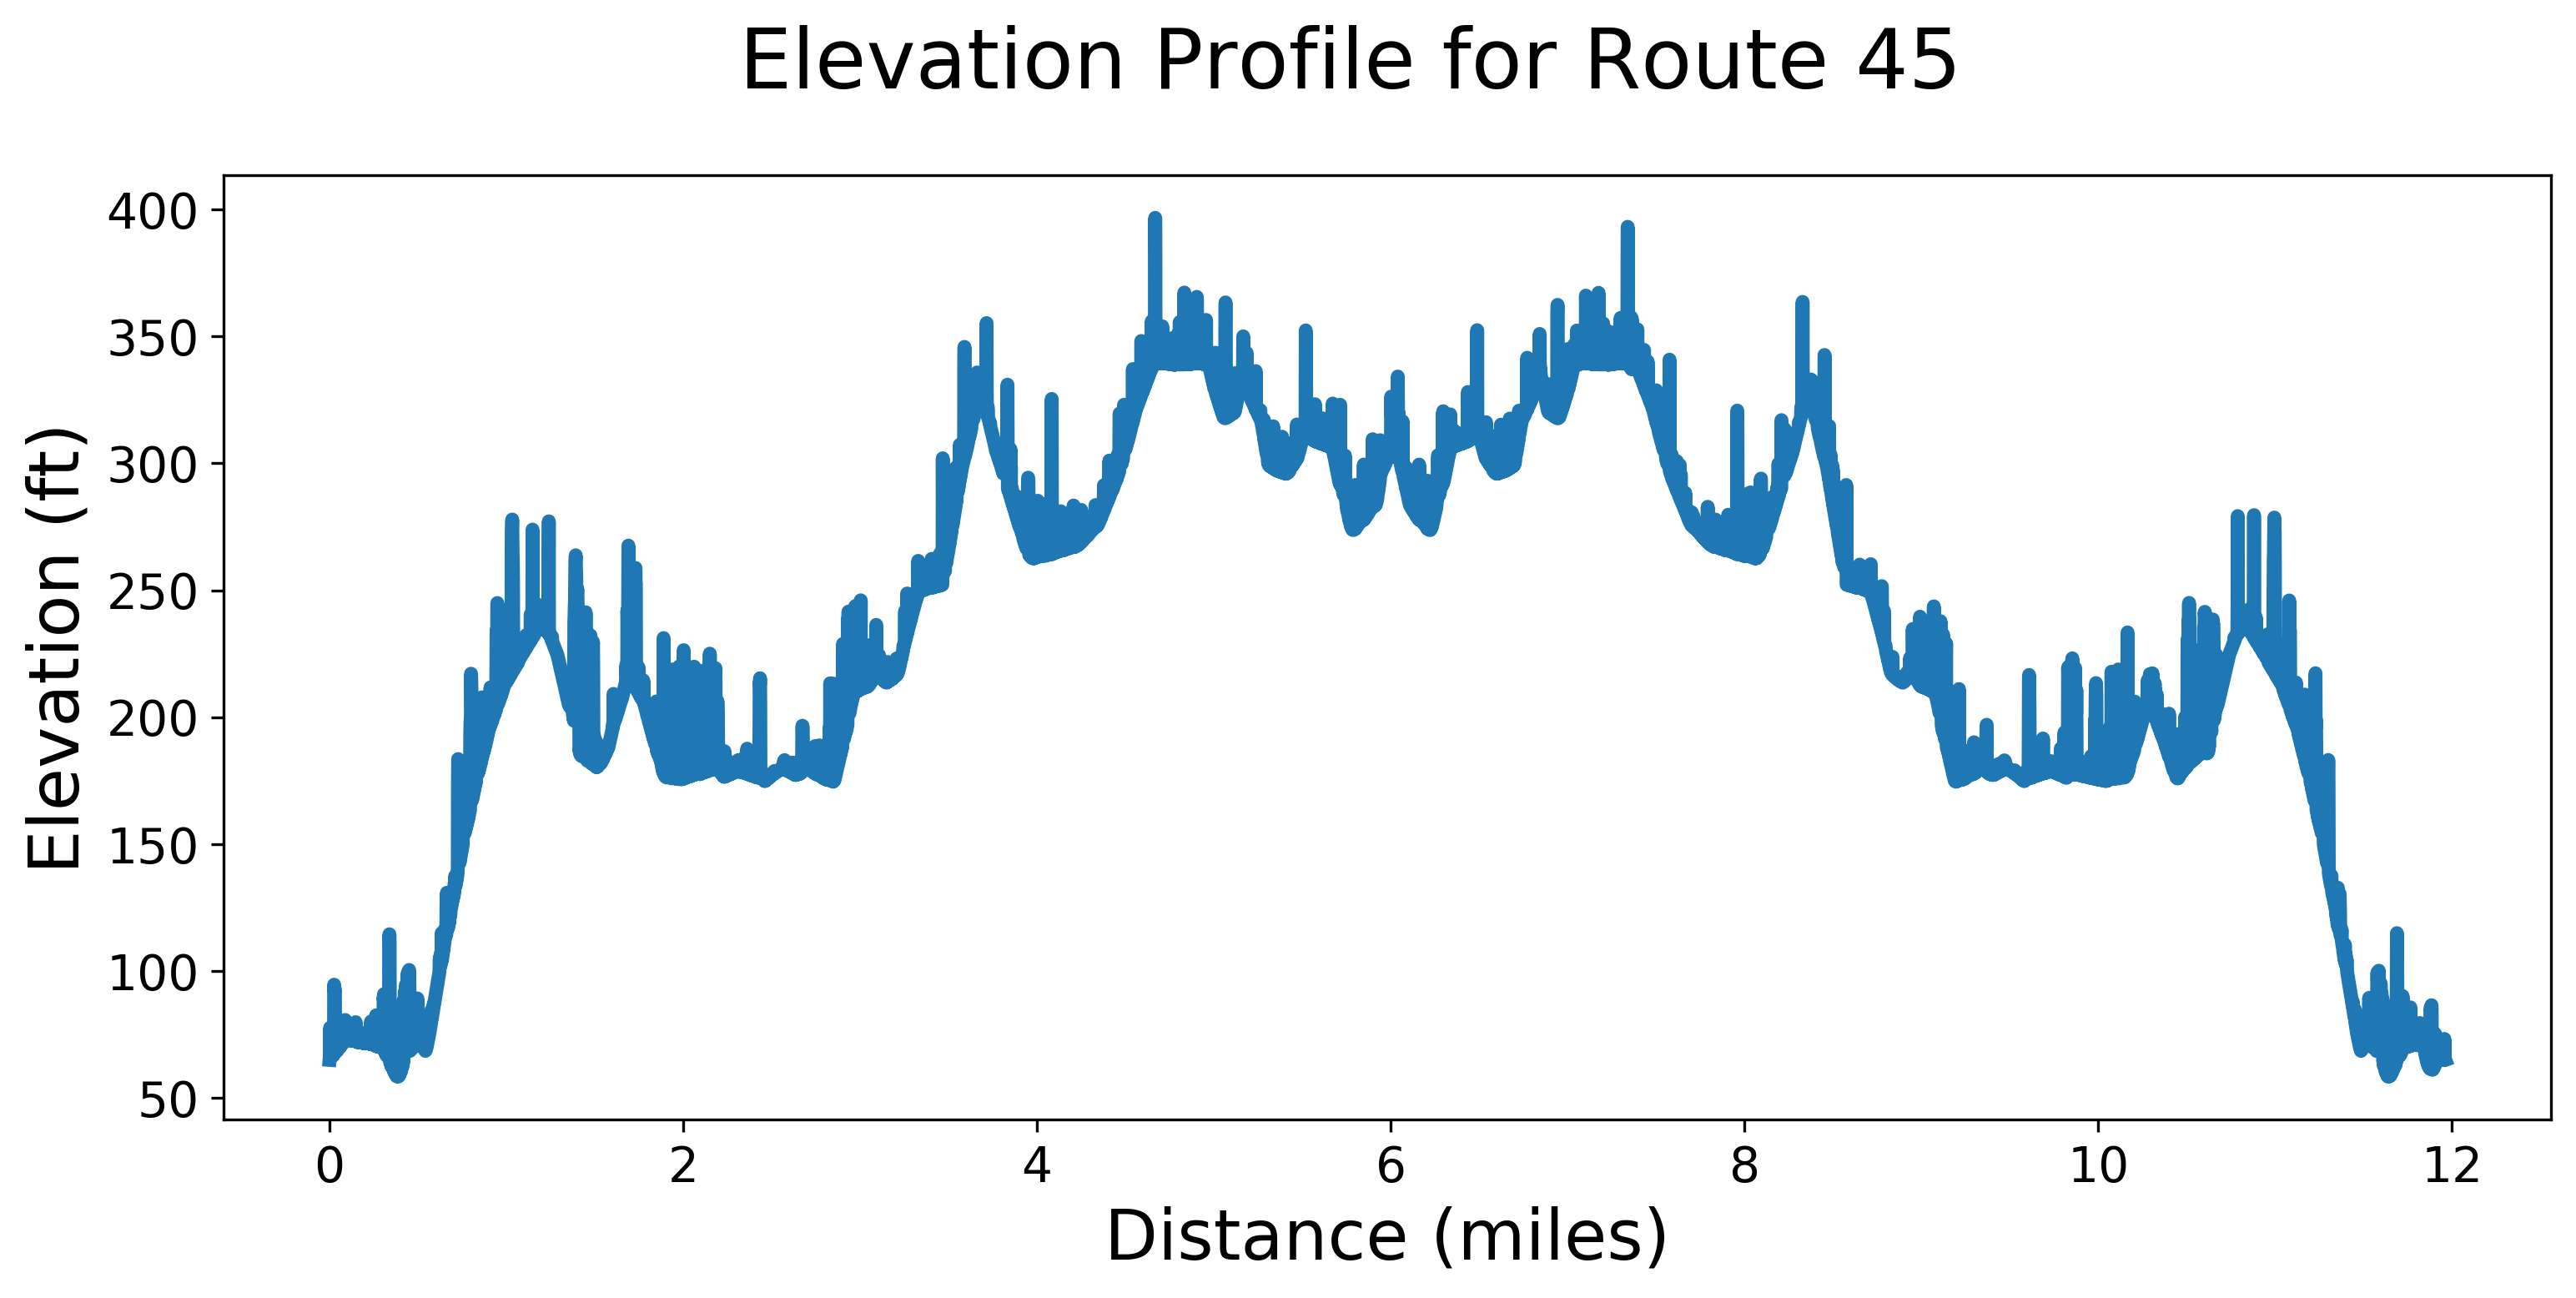

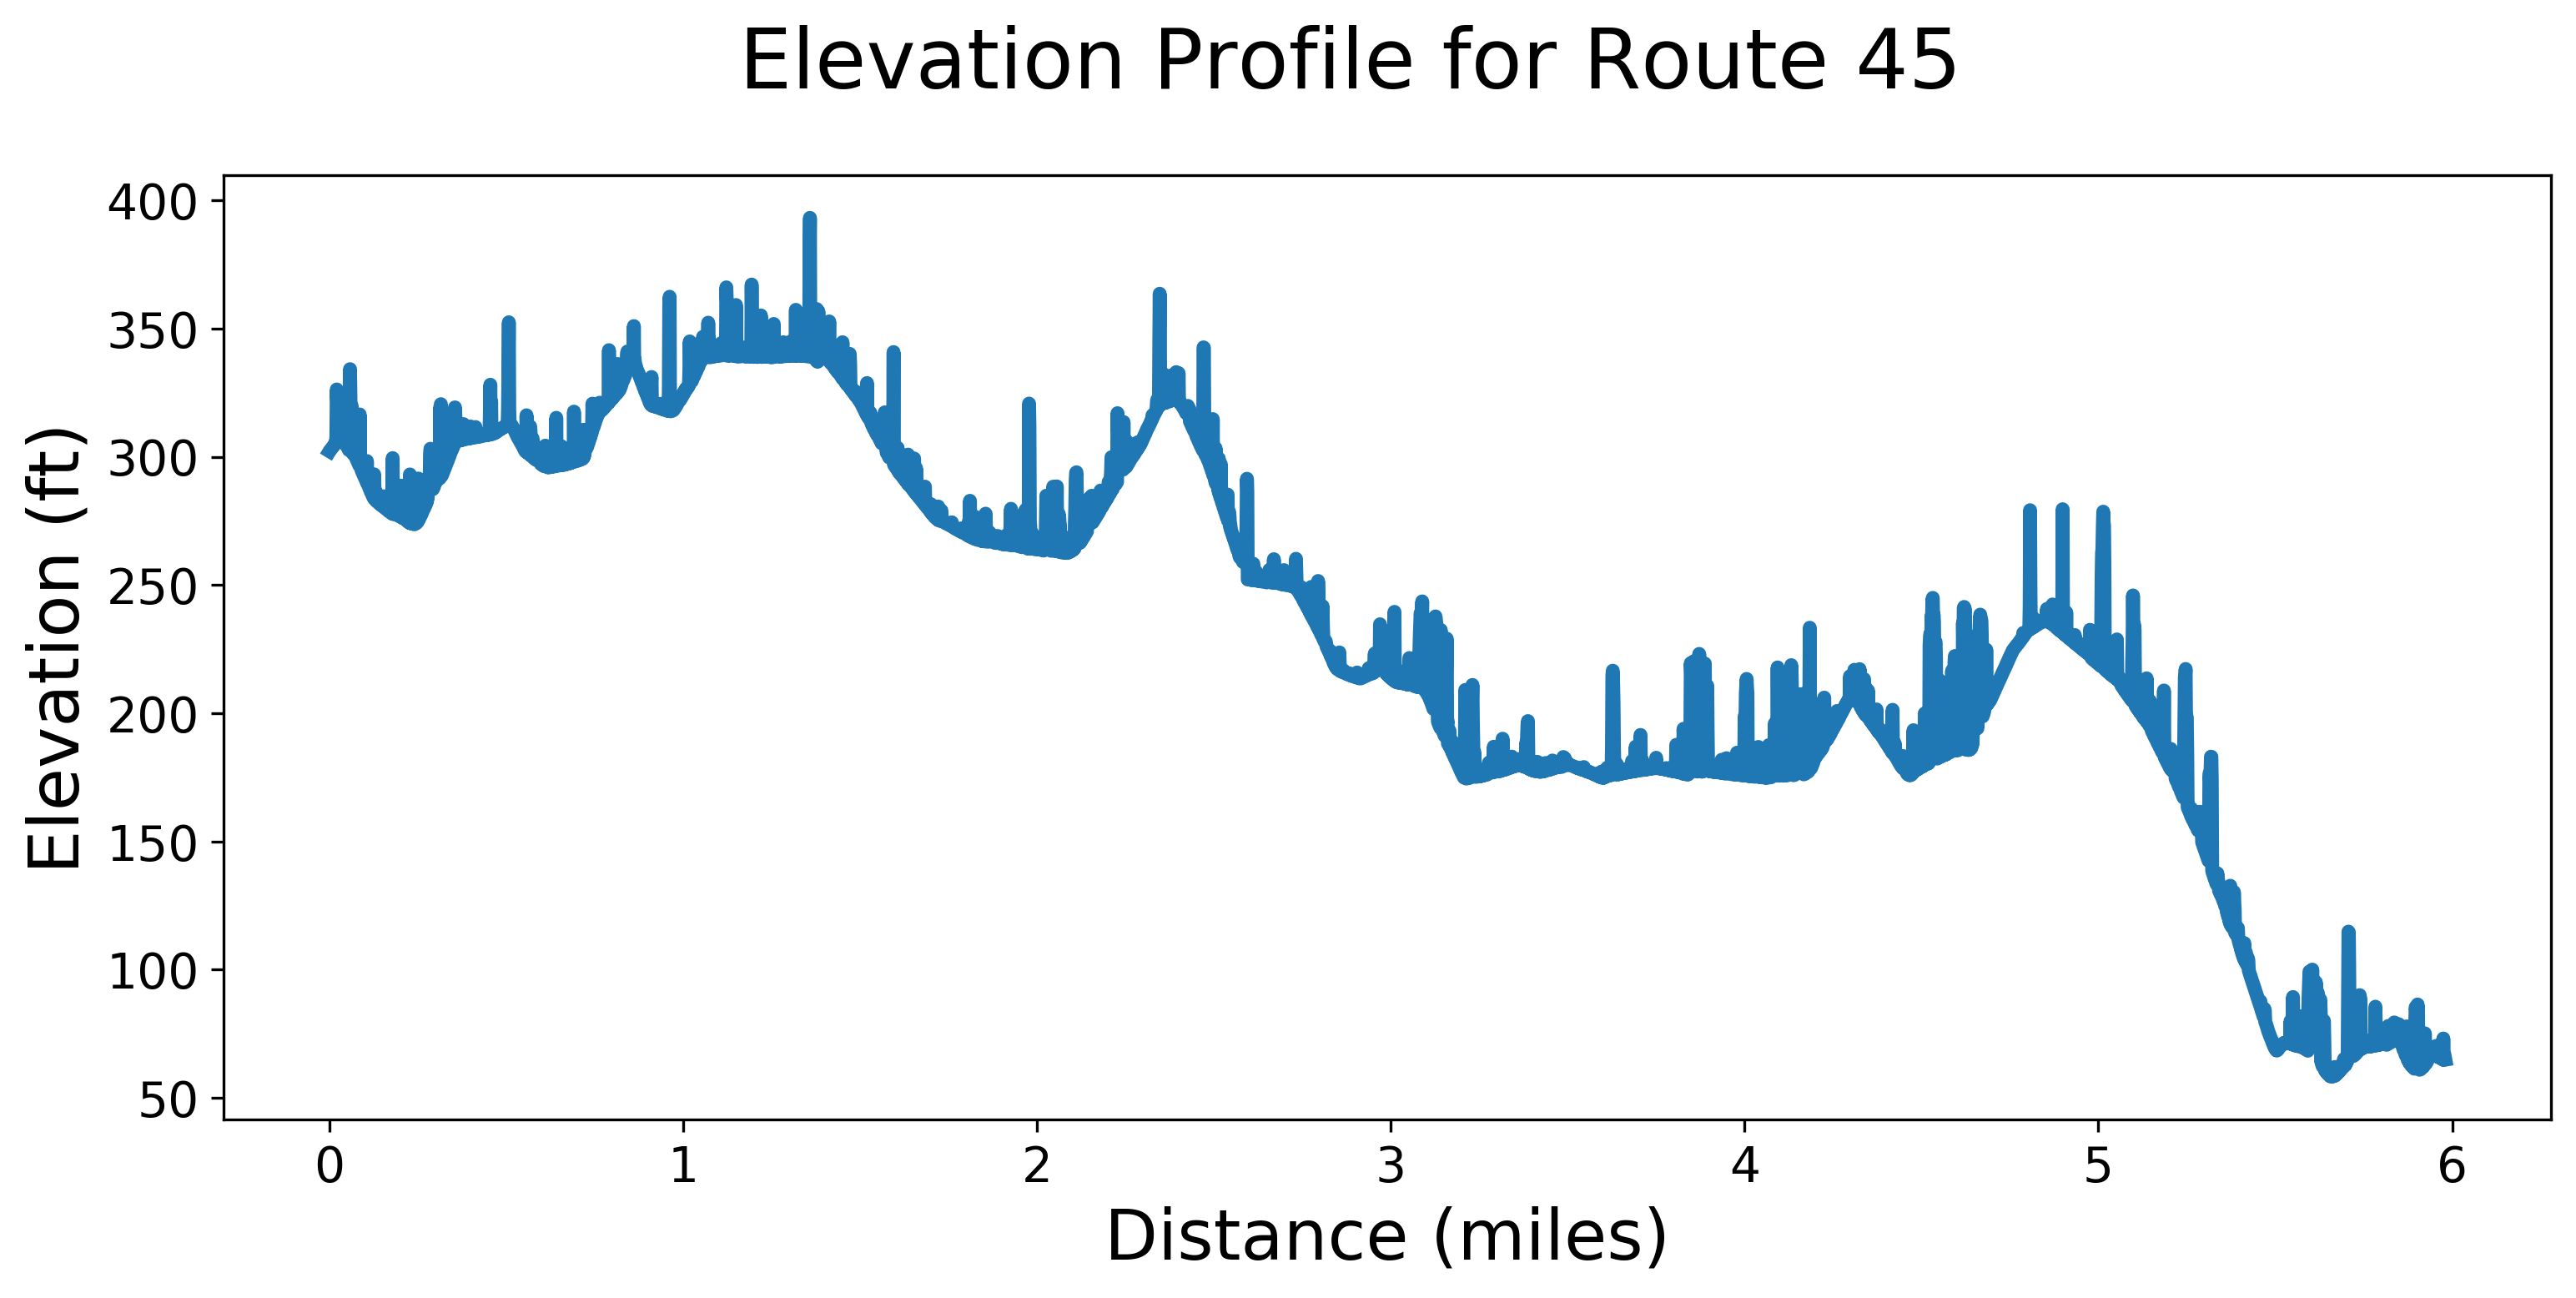

In [5]:
vis.elev(route['Z'], route['length'], 45)

# Zooming on the 1st half of the graph to see the bus go one way since the data is for the bus going both ways

out_bound_raw, in_bound_raw = np.split(route['Z'].values, 2)

out_bound2, in_bound2 = np.split(route['length'].values, 2)

vis.elev(in_bound_raw, out_bound2, 45)

### Elevation Plot After Filter Using Savitzky Golay

Savitzky golay filter's purpose is to smooth out data and increase the accuracy of the data without distorting the signal tendency. Given the number of points in the window length and the polynomial degree, the filter will try to find a best fit curve for the data. Noise is filtered by least square regression.

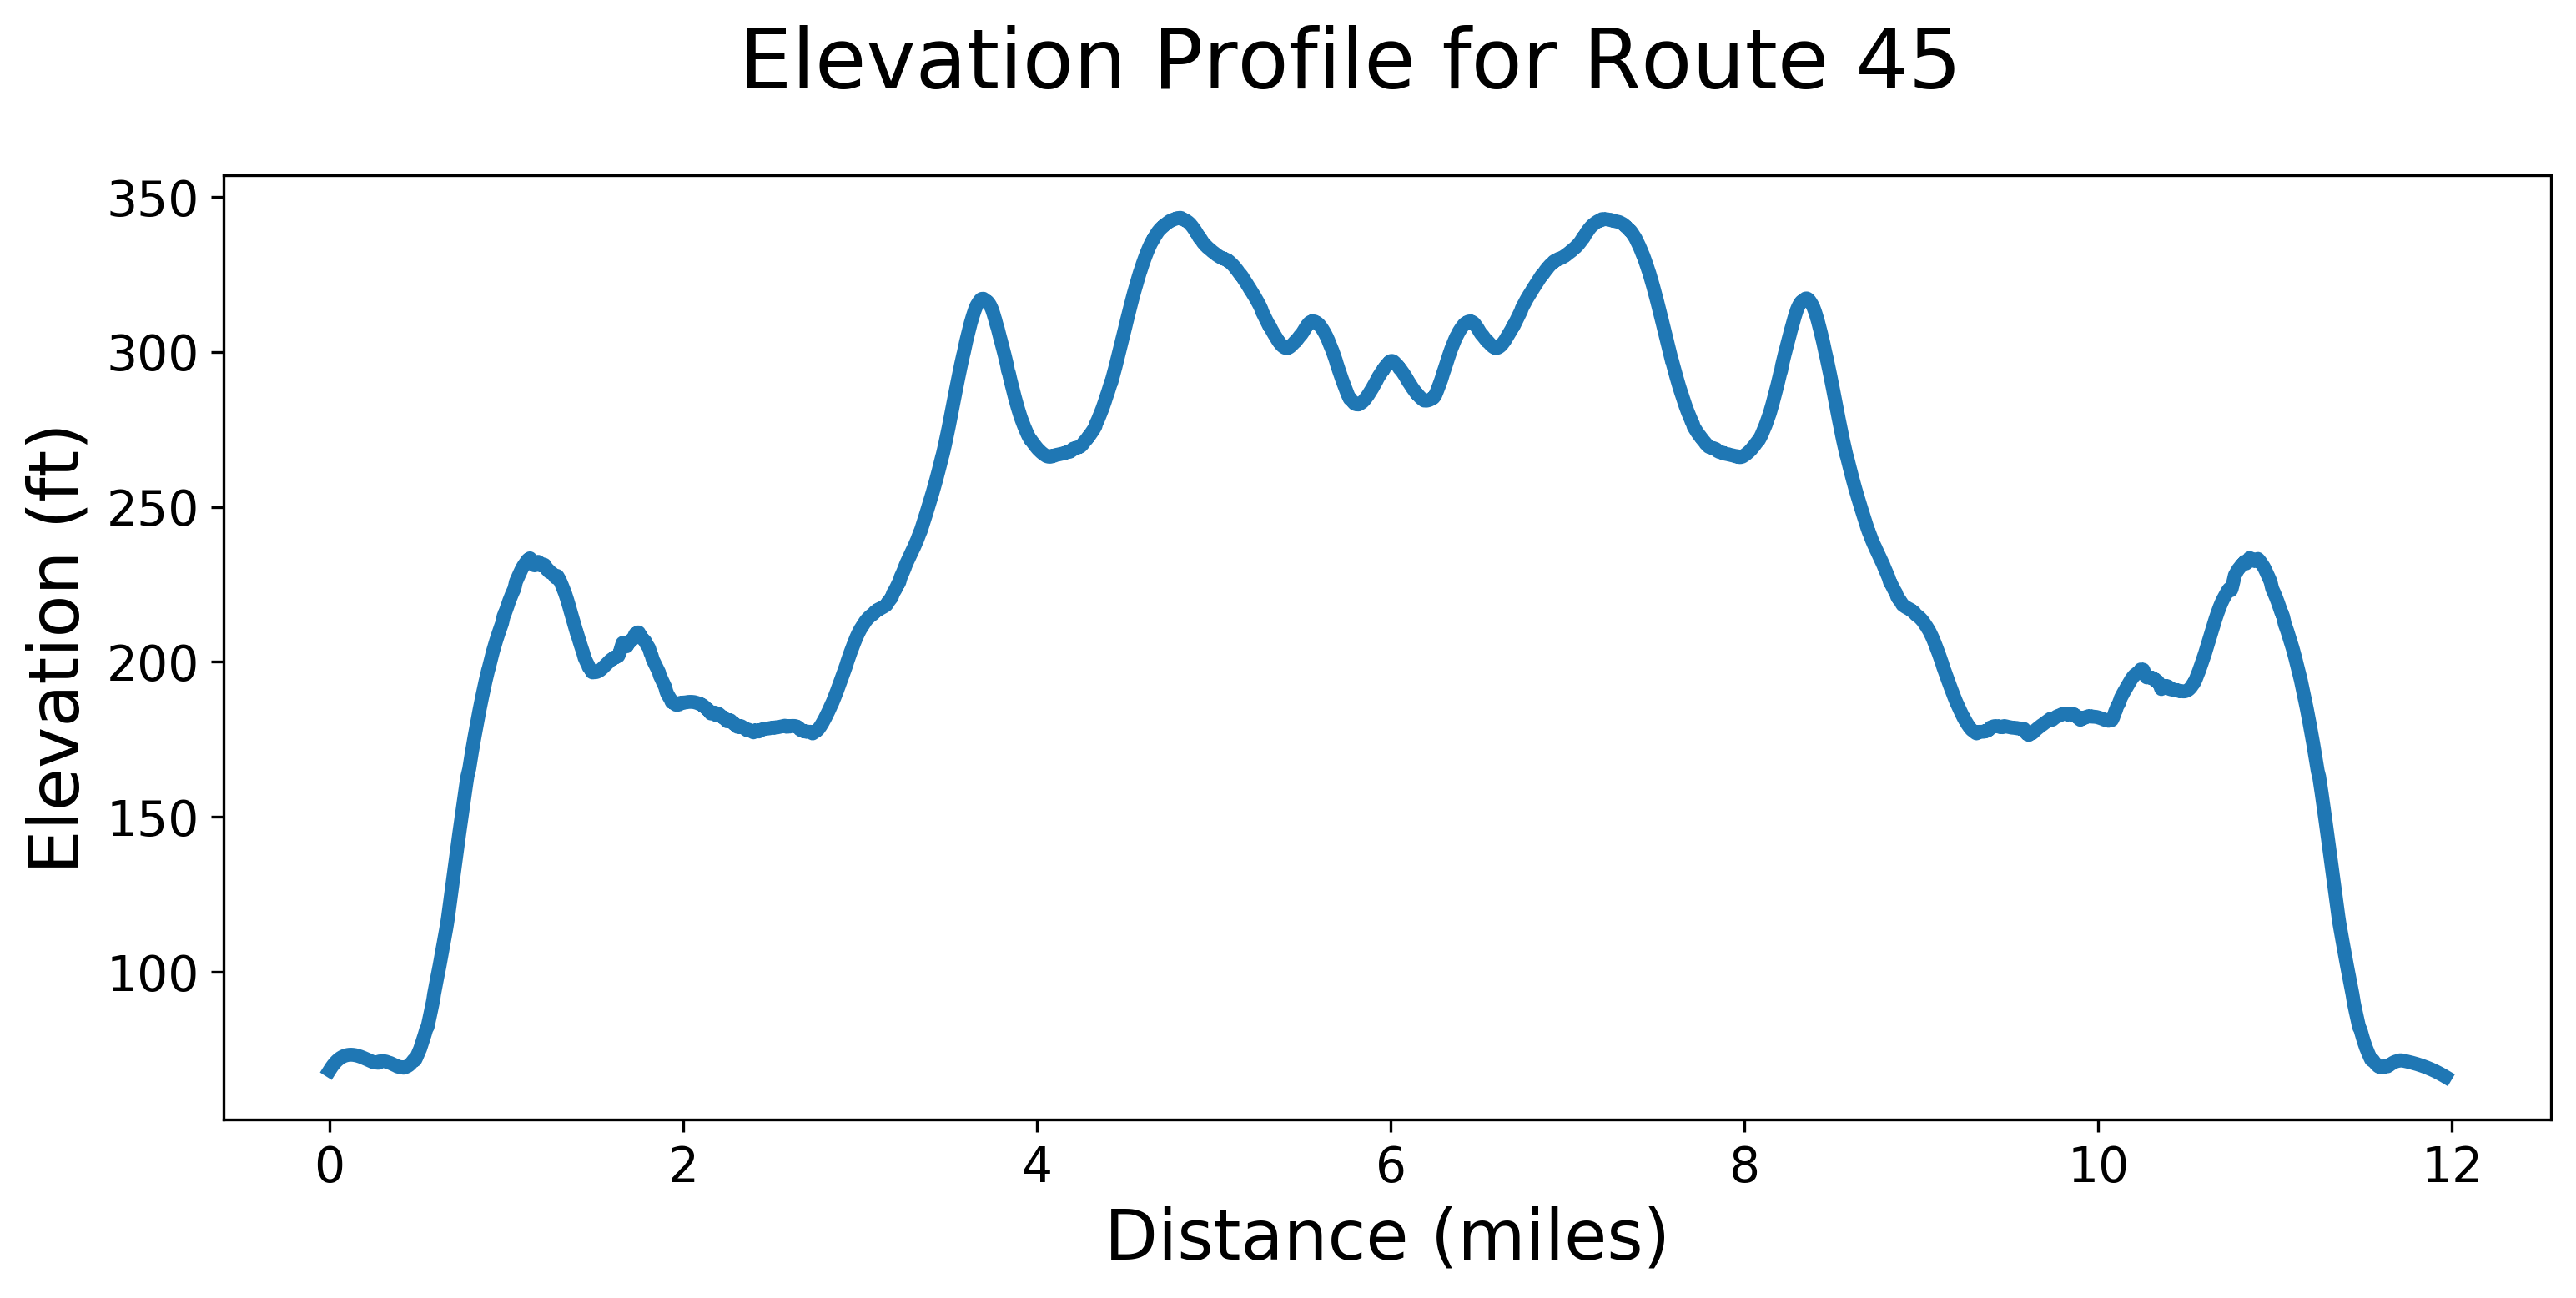

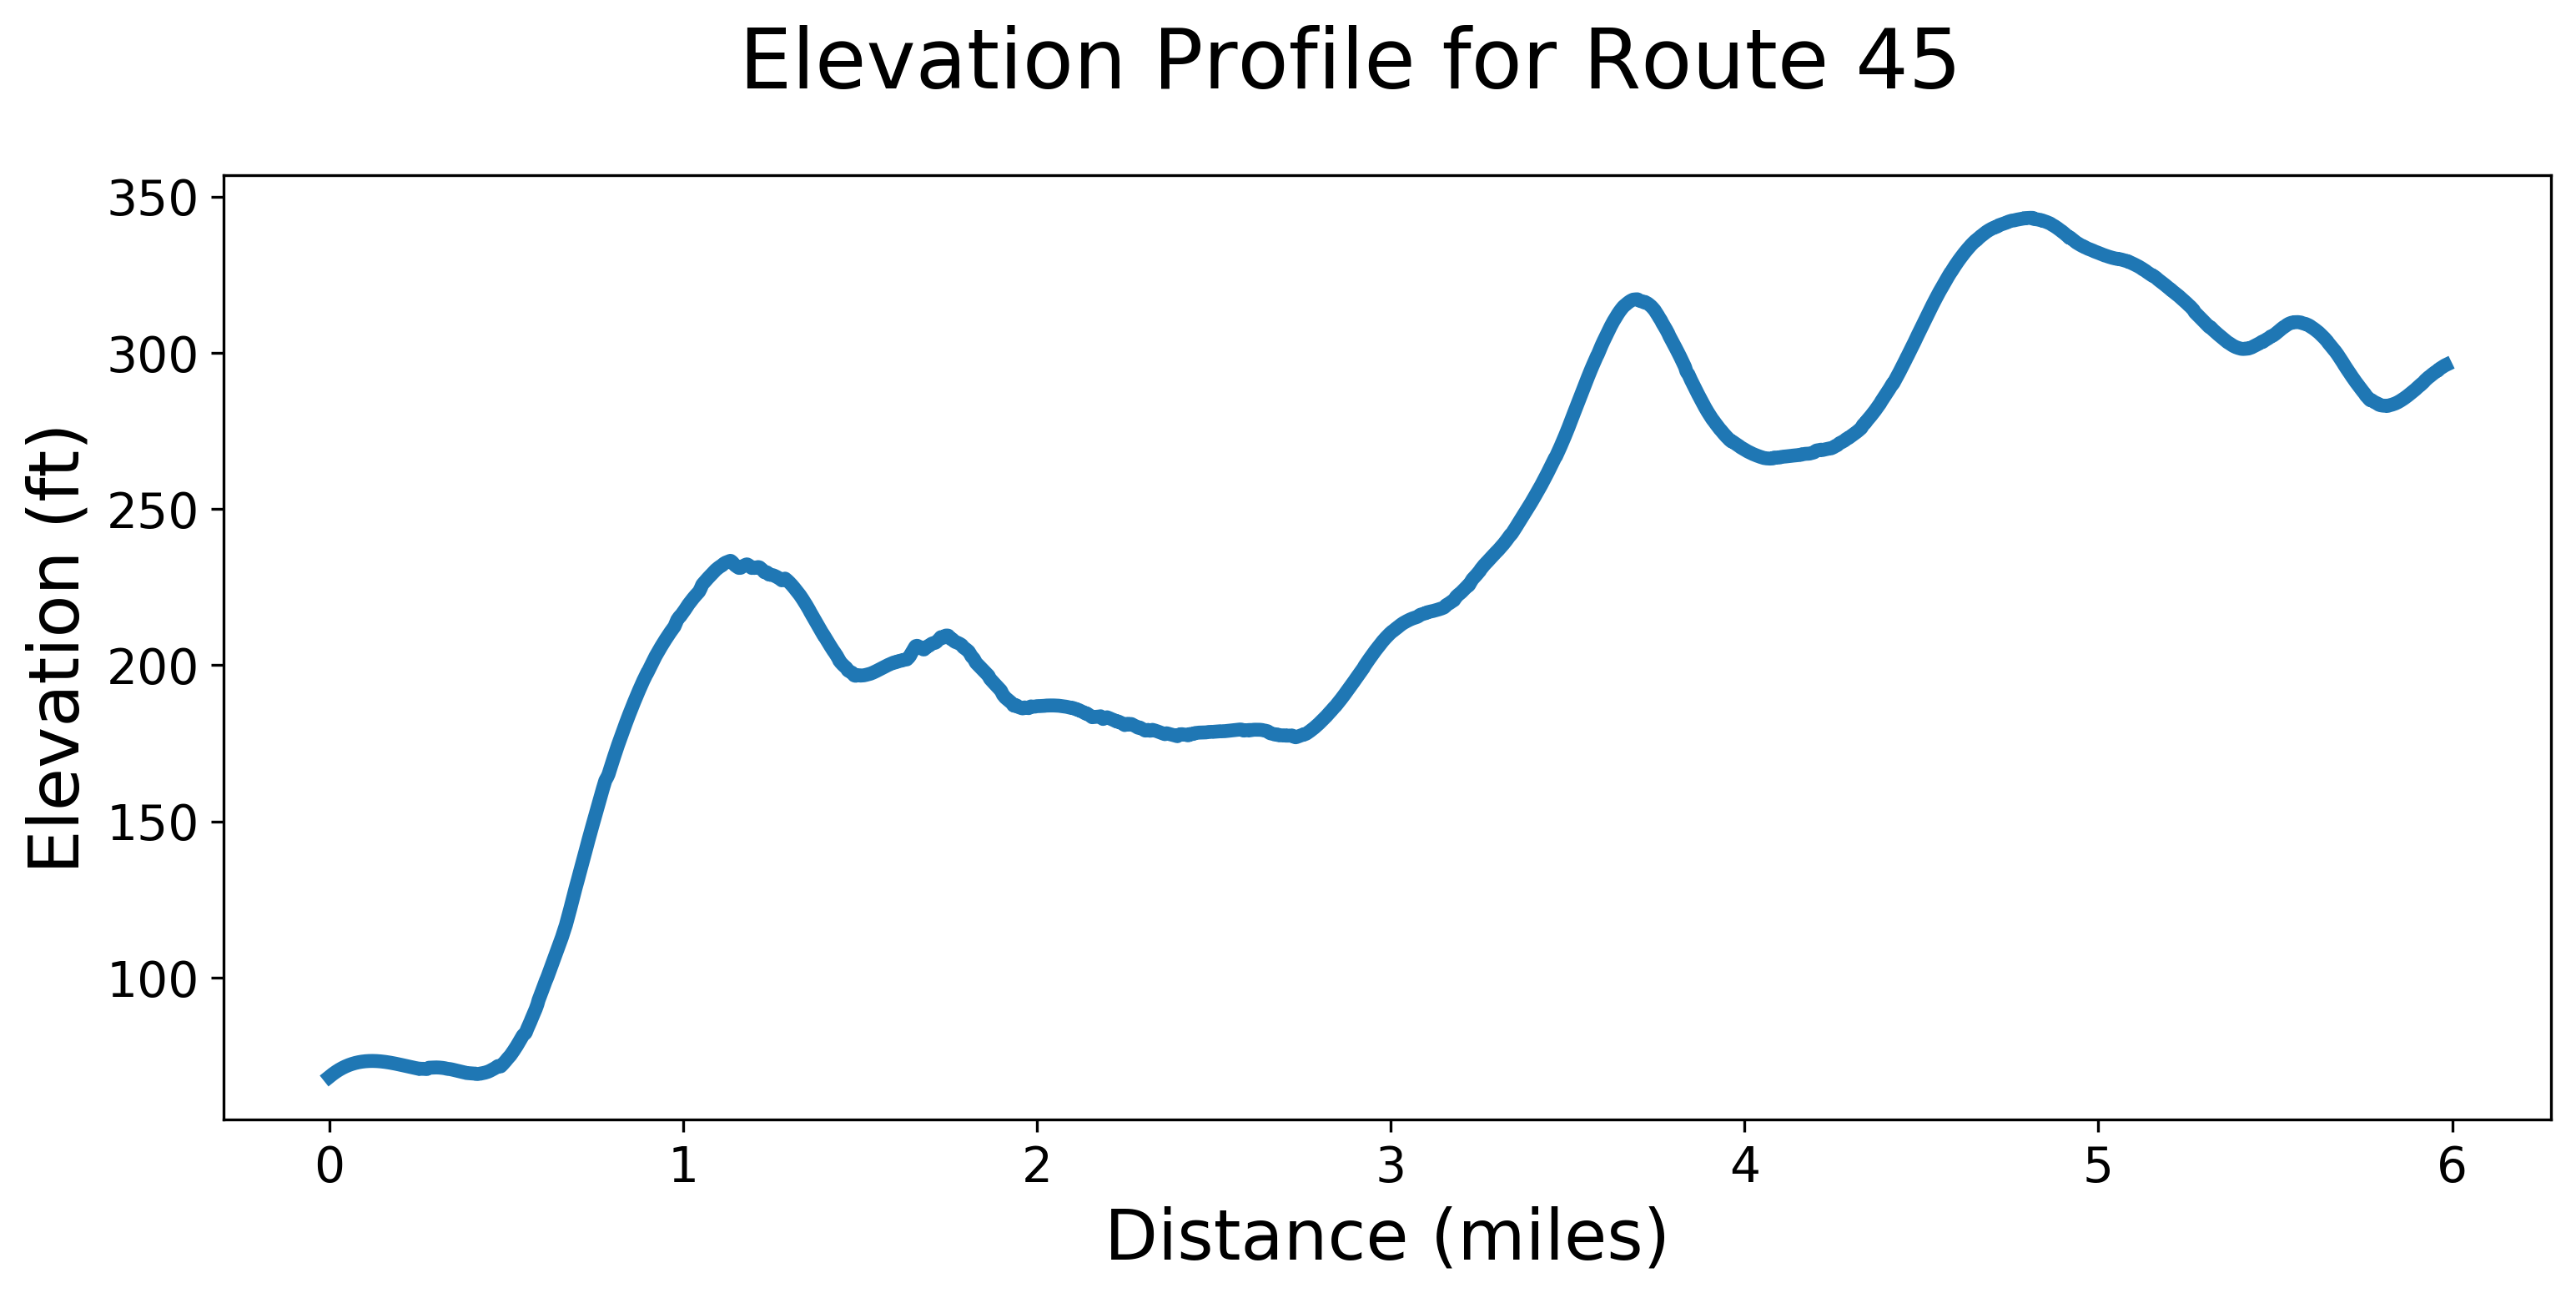

In [6]:
points = route[('Z')].values

y_new = sf(points, 439, 3,  axis = 0) 
# 441 is the window length and 3 is the degree of polynomial. 441 points*6ft = 2634ft which is about 1/2 a mile. 
# This means there is 2 inflection points in 1/2 mile which is reasonable.

out_bound, in_bound = np.split(y_new, 2)

vis.elev(y_new, route['length'].values, 45)

vis.elev(out_bound, out_bound2, 45)

### Calculation and Plotting of Grade

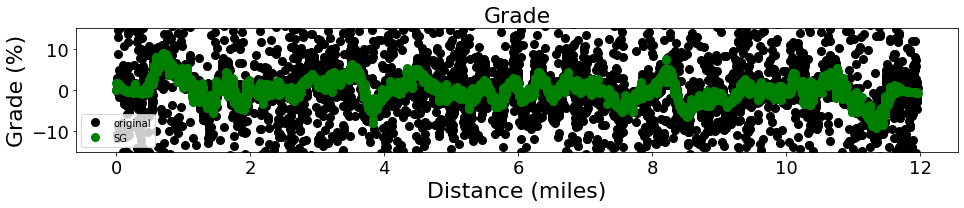

In [7]:
# Calculating grade of unfiltered data
grade = [0]

for i in range(1,len(points)):
    grade.append((points[i]-points[i-1])/6)
    
route['grade']=grade
route.head(10)


# Calculating grade of filtered data
grade_SG = [0]

for i in range(1,len(y_new)):
    grade_SG.append((y_new[i]-y_new[i-1])/6)
    
route['grade_SG']=grade_SG
route.head(20)


# Plotting both calculated grades
fig = plt.figure(figsize=(13.5,3))

ax1 = fig.add_subplot(111)
ax1.set_title('Grade',fontsize = 22)
ax1.plot((route['length'])/5280,route['grade']*100,'o',label='original',color = 'k',ms = 8)
ax1.plot((route['length'])/5280,route['grade_SG']*100,'o',label='SG',color = 'g',ms = 8)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xlabel("Distance (miles)",fontsize = 22)
ax1.set_ylabel("Grade (%)",fontsize = 22)
ax1.legend()
ax1.set_ylim(-15,15)
plt.tight_layout()

### Analysis of Route 45

Looking at the unfiltered elevation plot of route 45, we can see a lot of noise. The noise could be produced by a building or a bird flying by when the elevation data was taken. Removing some of the noise will allow us to have a better picture of the elevation profile of the route which will lead to more accurate calculation of the load on the battery. Although the filtered elevation is better, there are still noise giving us inaccurate results like aat around 2 miles.

The grade of the unfiltered data looks very random and not connected. The grade of the filtered data is connected which is what should happen since it is plotted against the distance the bus travels on the route. The grade filtered route also falls under seattle's grade limit which is around 10%.

### Next Steps

Earlier this quarter, King County Metro and TriMet (Portland's transit system) reached out and was interested in our project. King County Metro gave us a list of route they were interested in making electric buses. Out of the list, route 116 was the only one that was within the range of the surface terrain I had. Using ArcMaps, I traced the route and added surface information so that I can now plot the elevation profile and grade. Since TriMet was interested, I also traced and added surface information to a route. After researching, I decided to explore route 4 since it is one of the more popular routes in Portland. To plot the elevation and grade of the routes, I will repeat the same code above for rt 45.

### Rt 116

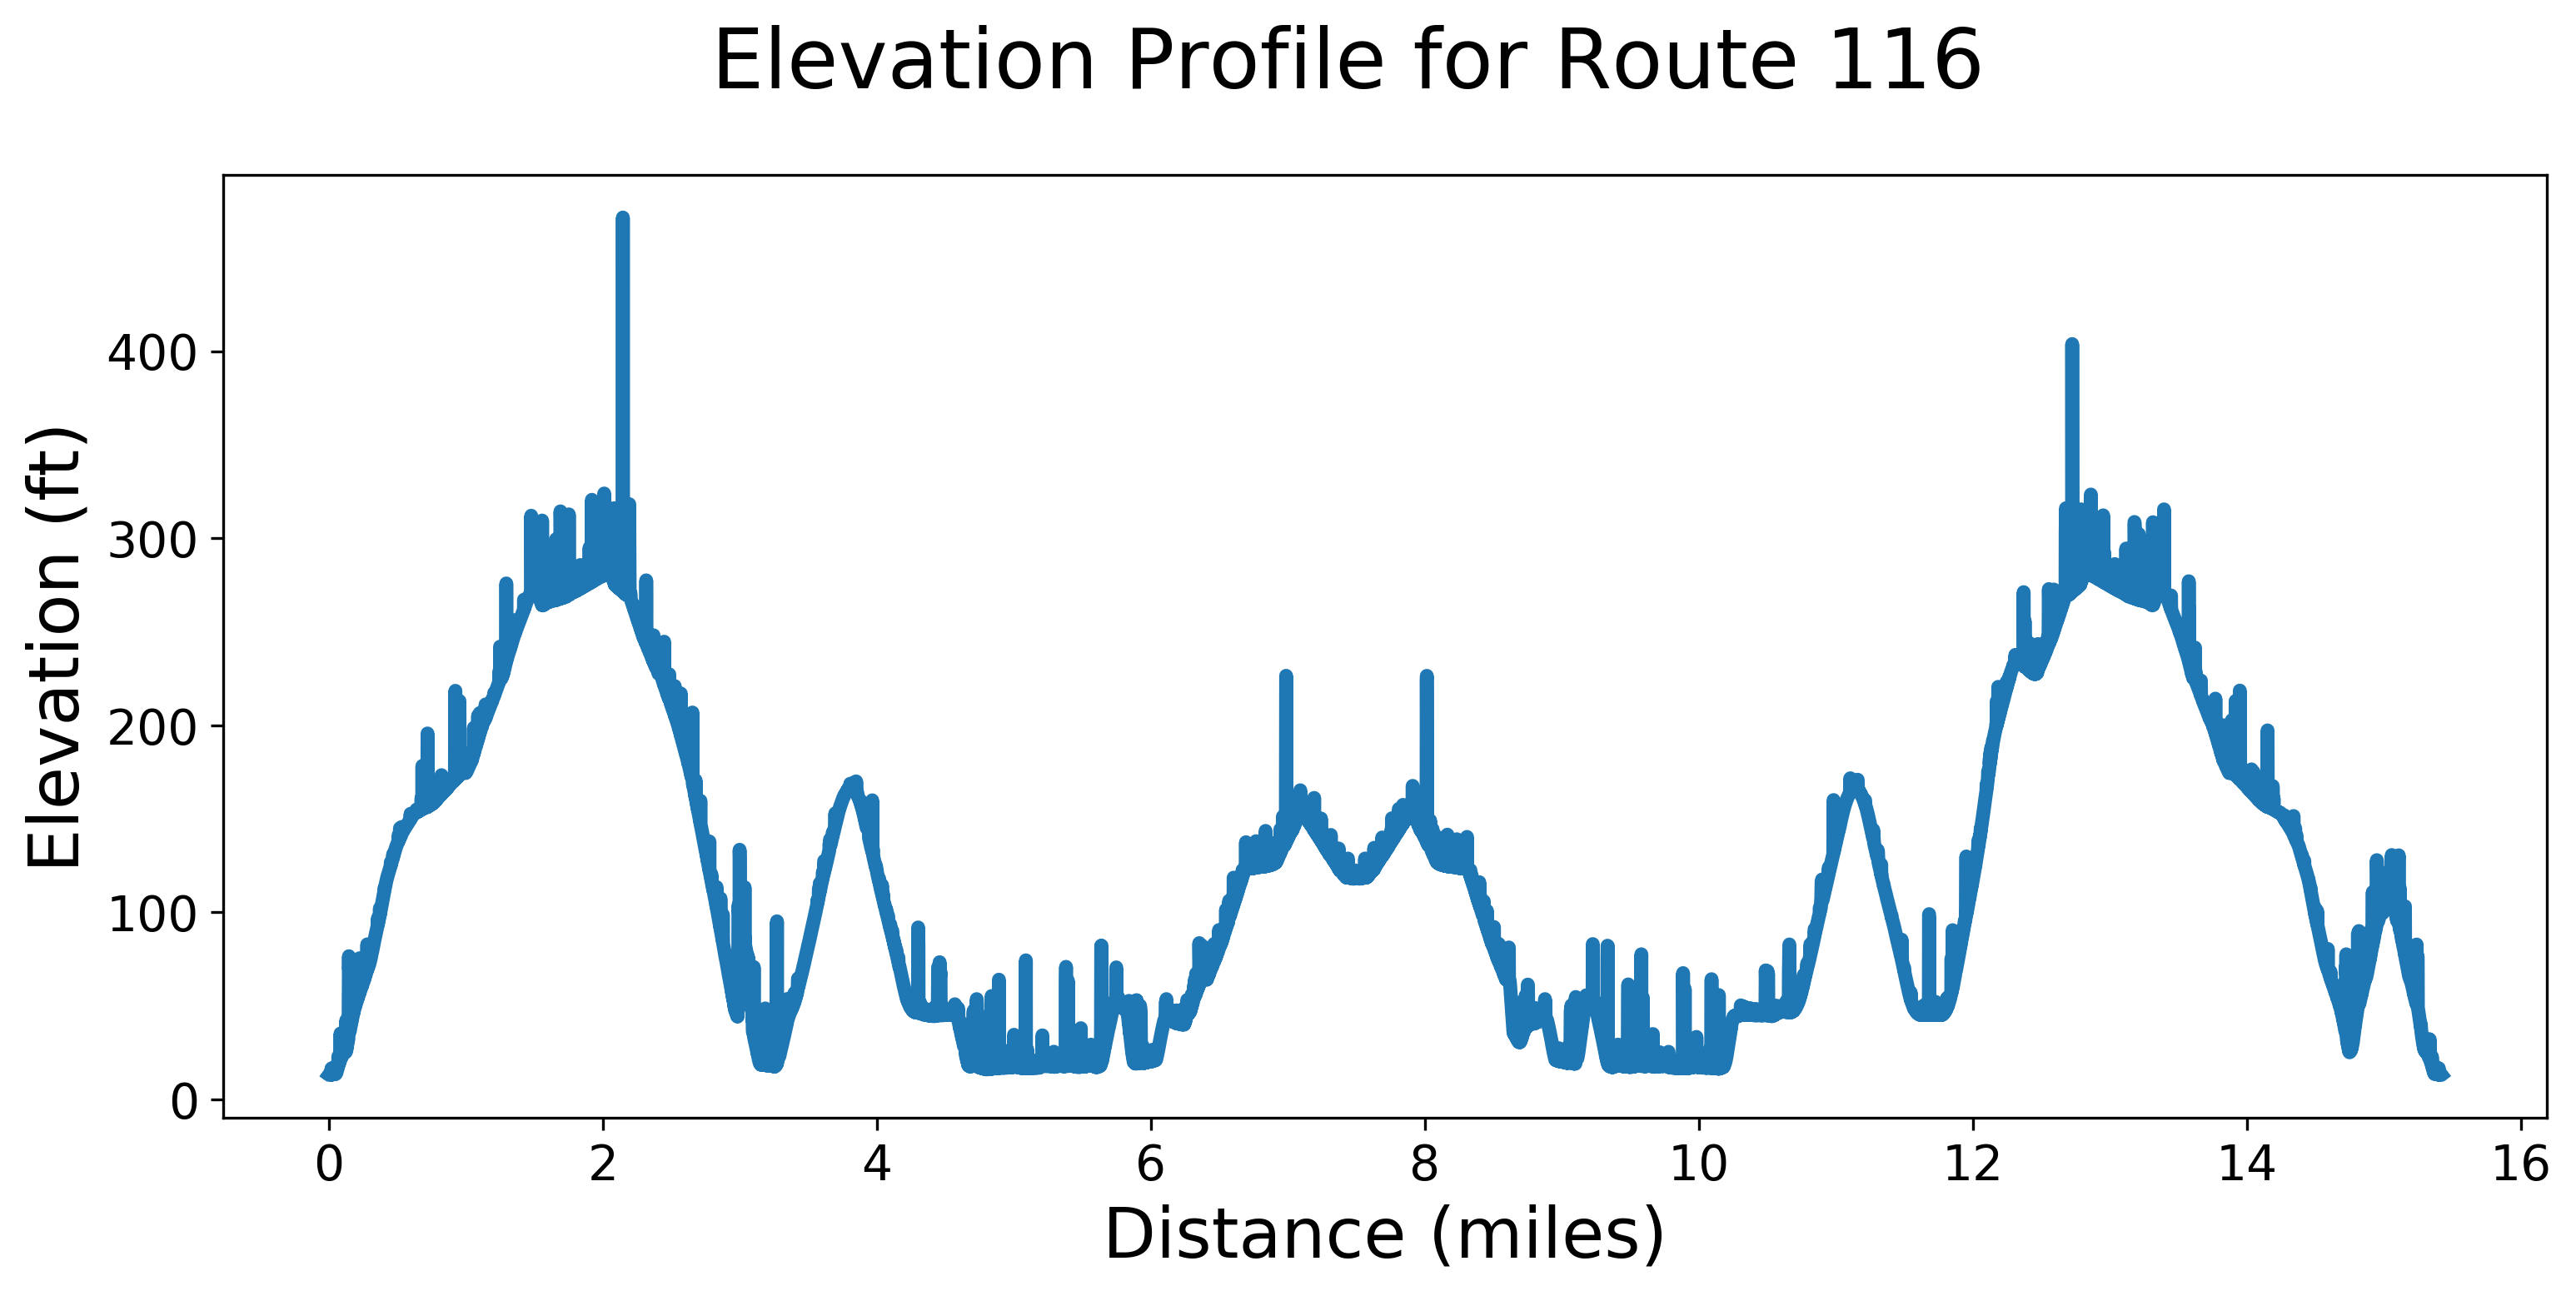

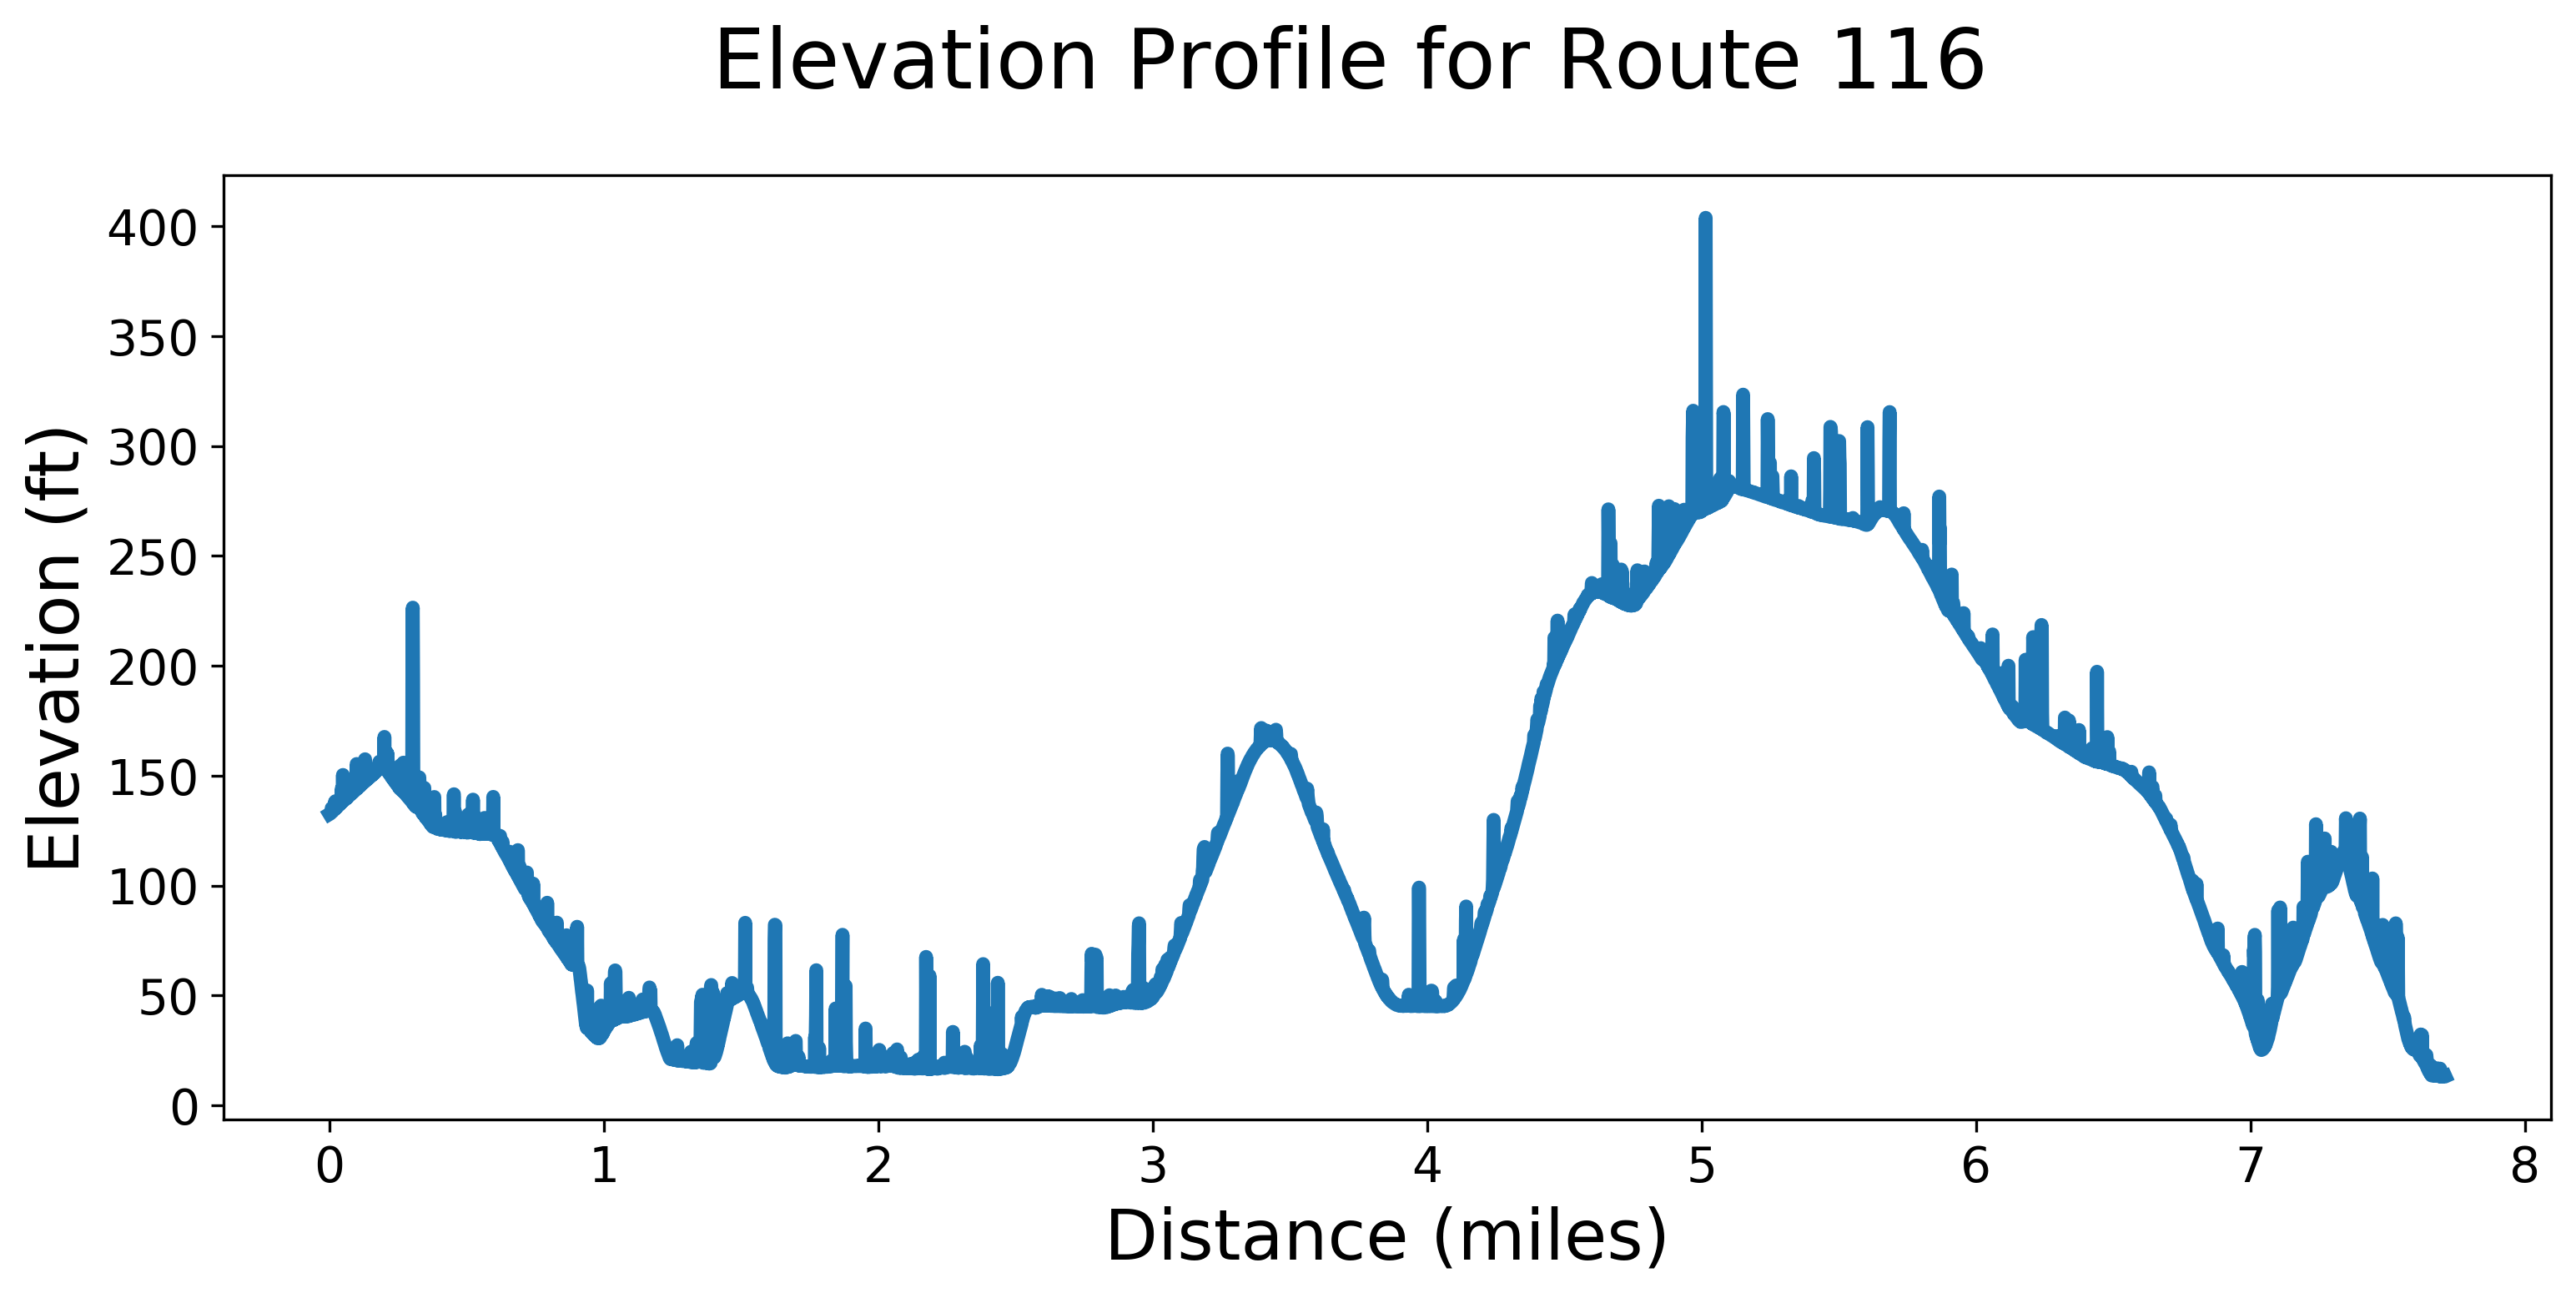

In [9]:
route_pts = '../data/rt116_pts.shp'

route = gpd.read_file(route_pts)


x = []

for i in route.index:
    
    x.append(i*6)
    

route['length'] = x
route.head(10)


vis.elev(route['Z'], route['length'], 116)
out_bound_raw, in_bound_raw = np.split(route['Z'].values, 2)
out_bound2, in_bound2 = np.split(route['length'].values, 2)
vis.elev(in_bound_raw, out_bound2, 116)

points = route[('Z')].values

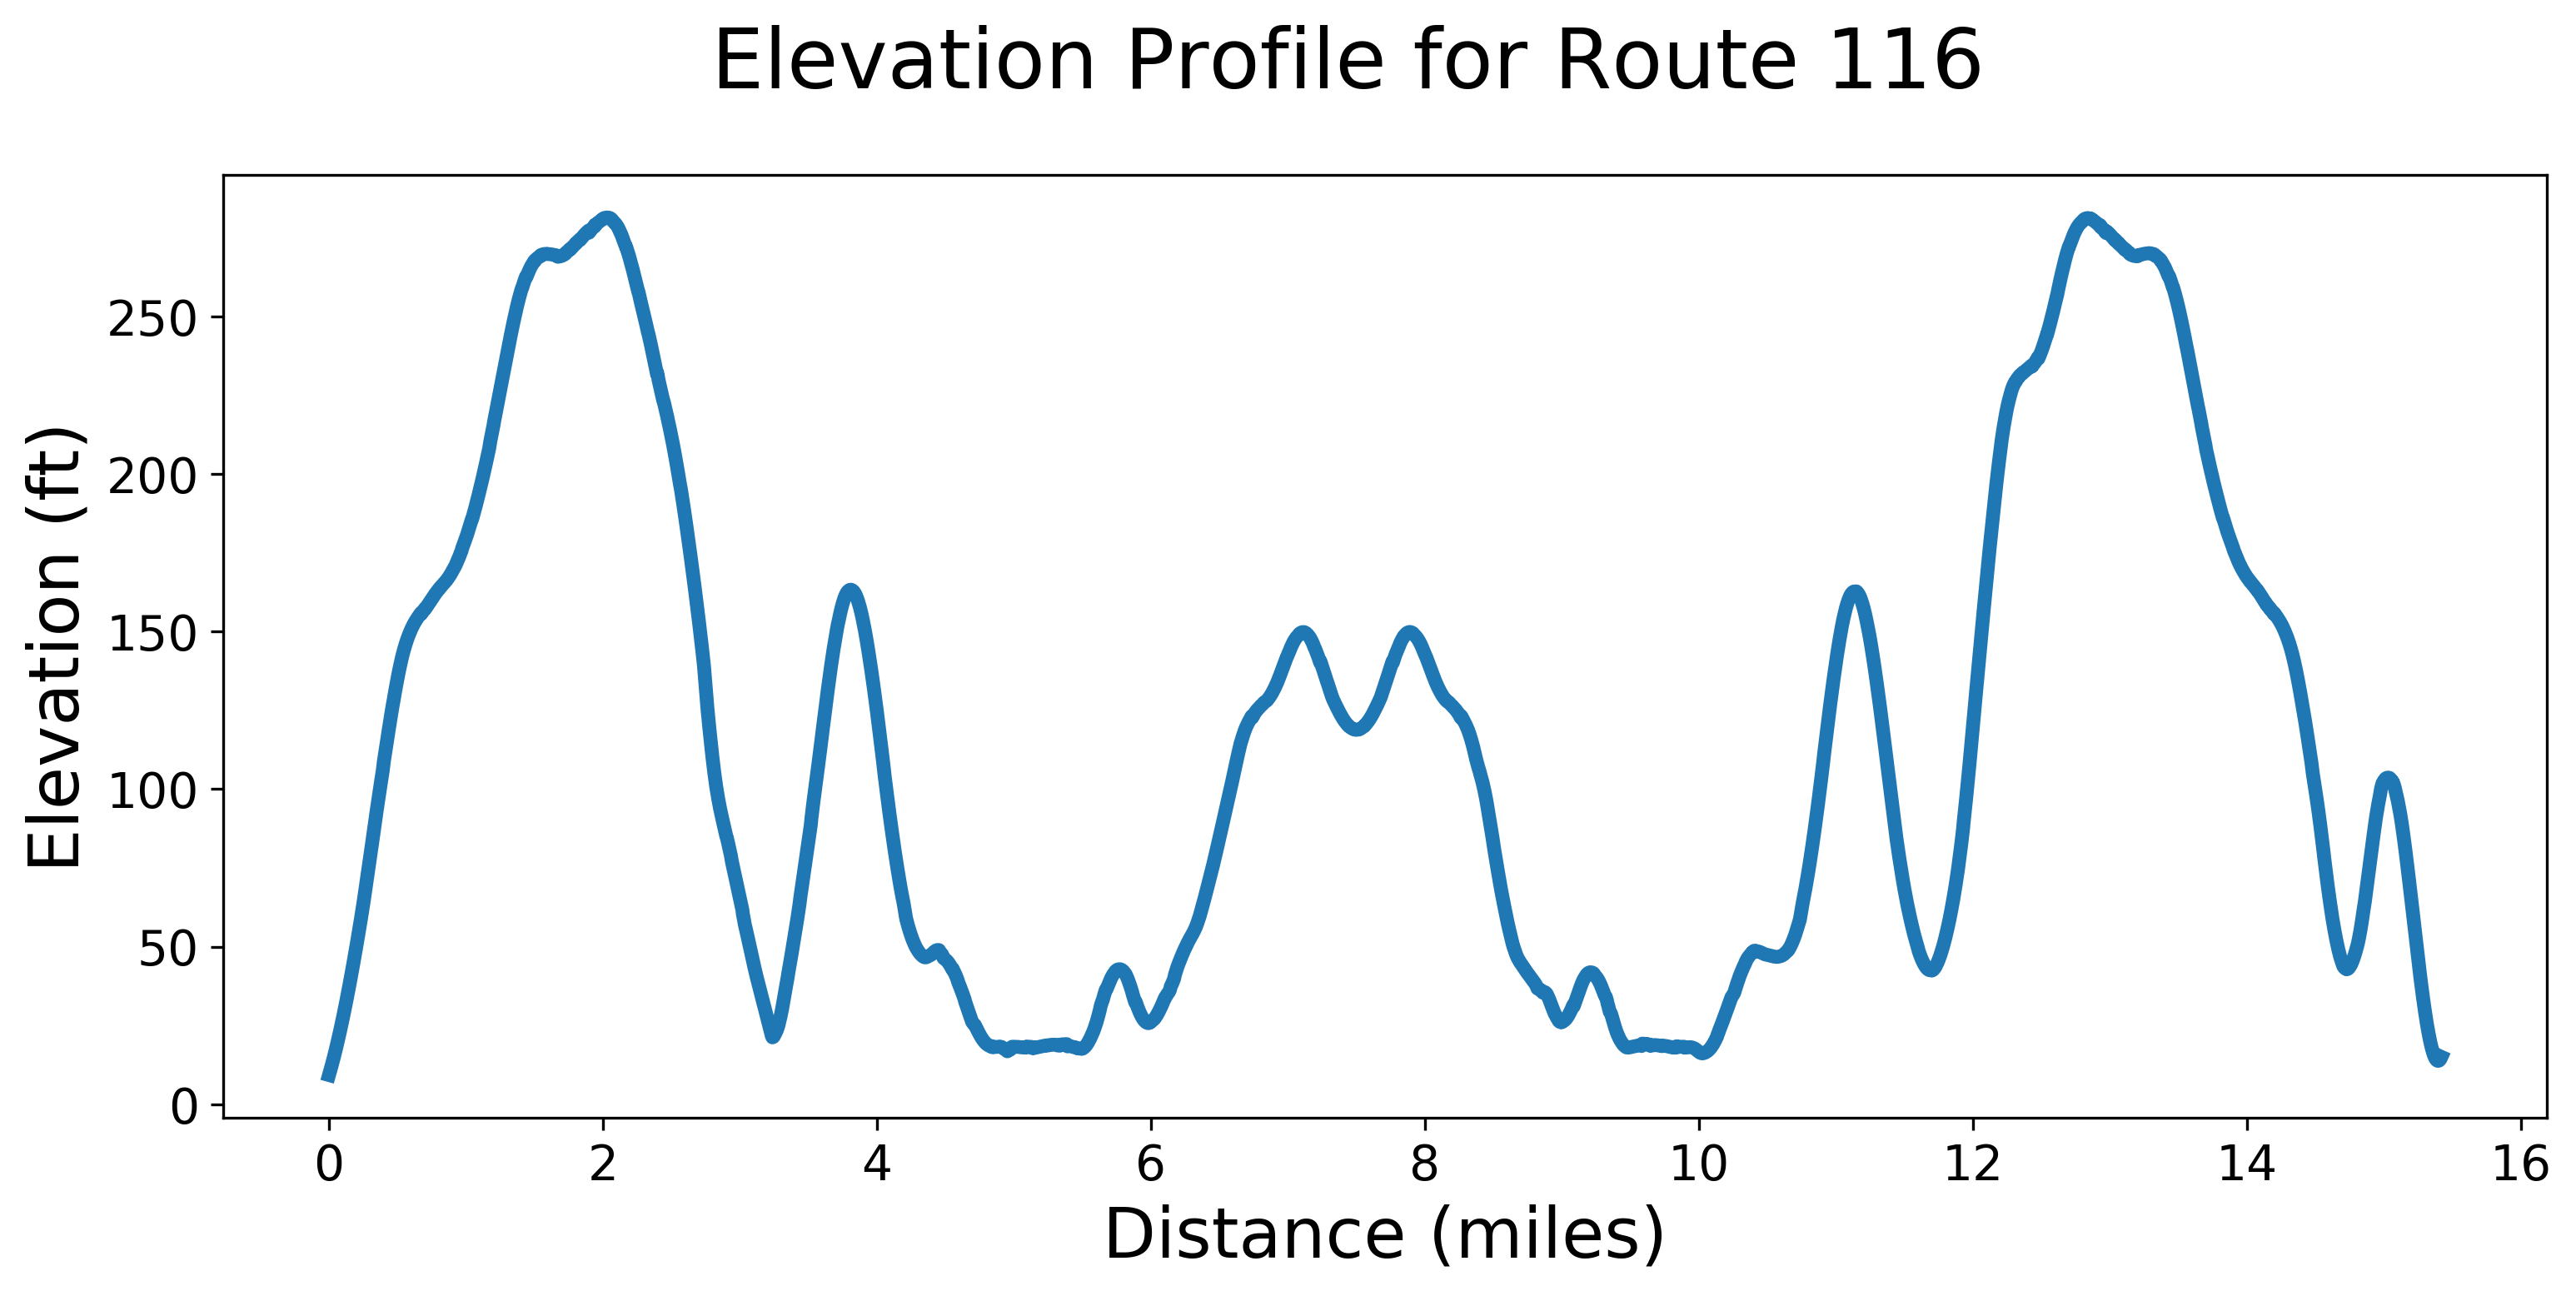

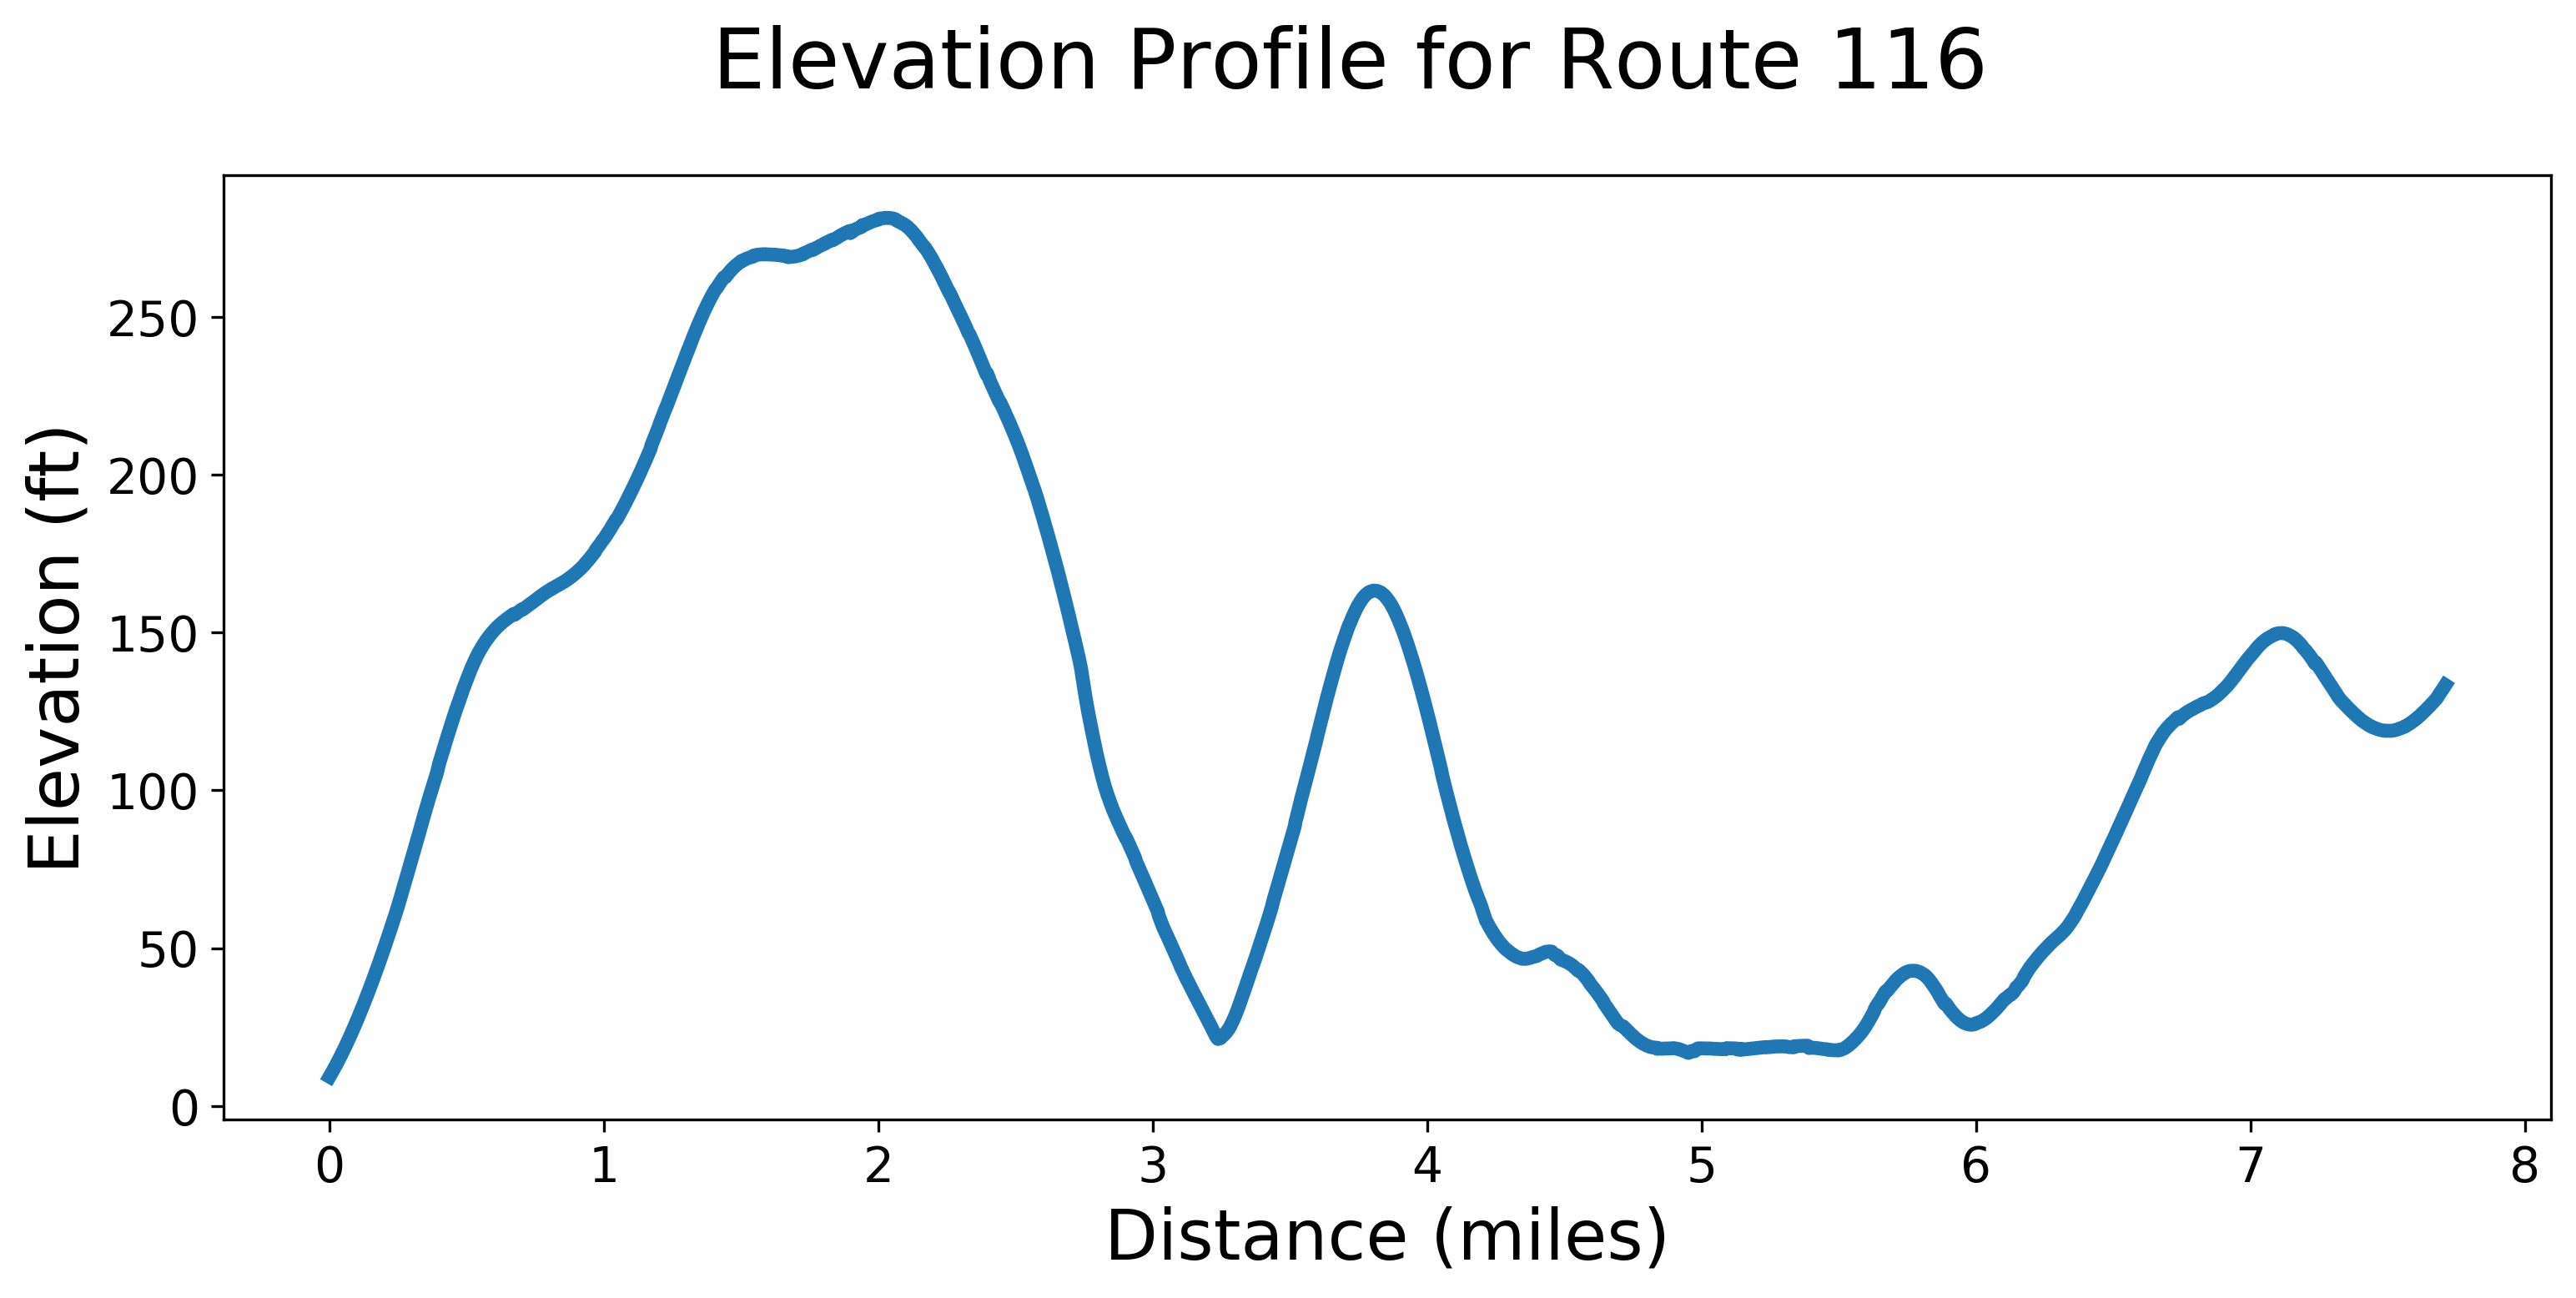

In [12]:
y_new = sf(points, 439, 3,  axis = 0) 
out_bound, in_bound = np.split(y_new, 2)
vis.elev(y_new, route['length'].values, 116)
vis.elev(out_bound, out_bound2, 116)

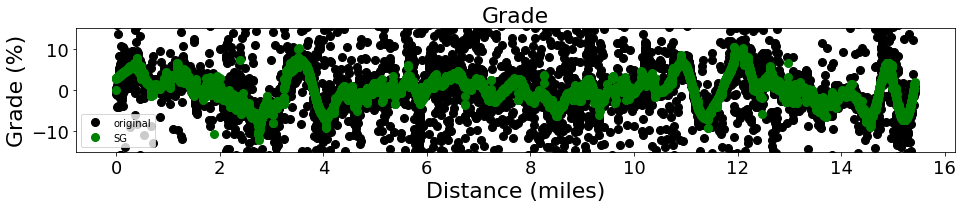

In [13]:
grade = [0]

for i in range(1,len(points)):
    grade.append((points[i]-points[i-1])/6)
    
route['grade']=grade
route.head(10)

grade_SG = [0]

for i in range(1,len(y_new)):
    grade_SG.append((y_new[i]-y_new[i-1])/6)
    
route['grade_SG']=grade_SG
route.head(20)

fig = plt.figure(figsize=(13.5,3))

ax1 = fig.add_subplot(111)
ax1.set_title('Grade',fontsize = 22)
ax1.plot((route['length'])/5280,route['grade']*100,'o',label='original',color = 'k',ms = 8)
ax1.plot((route['length'])/5280,route['grade_SG']*100,'o',label='SG',color = 'g',ms = 8)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xlabel("Distance (miles)",fontsize = 22)
ax1.set_ylabel("Grade (%)",fontsize = 22)
ax1.legend()
ax1.set_ylim(-15,15)
plt.tight_layout()

### Analysis of Route 116

Overall, the savitzky golay filter did a good job at filtering most of the noise from the unfiltered data. However, we can see there are little ridges that are not smooth at around 5 miles. Using the grade plot, we see that translated. We can see the grade oscillate rapidly at around 5 miles. The filter grade follows the Seattle limits which is about 10%.

### Rt4 PDX

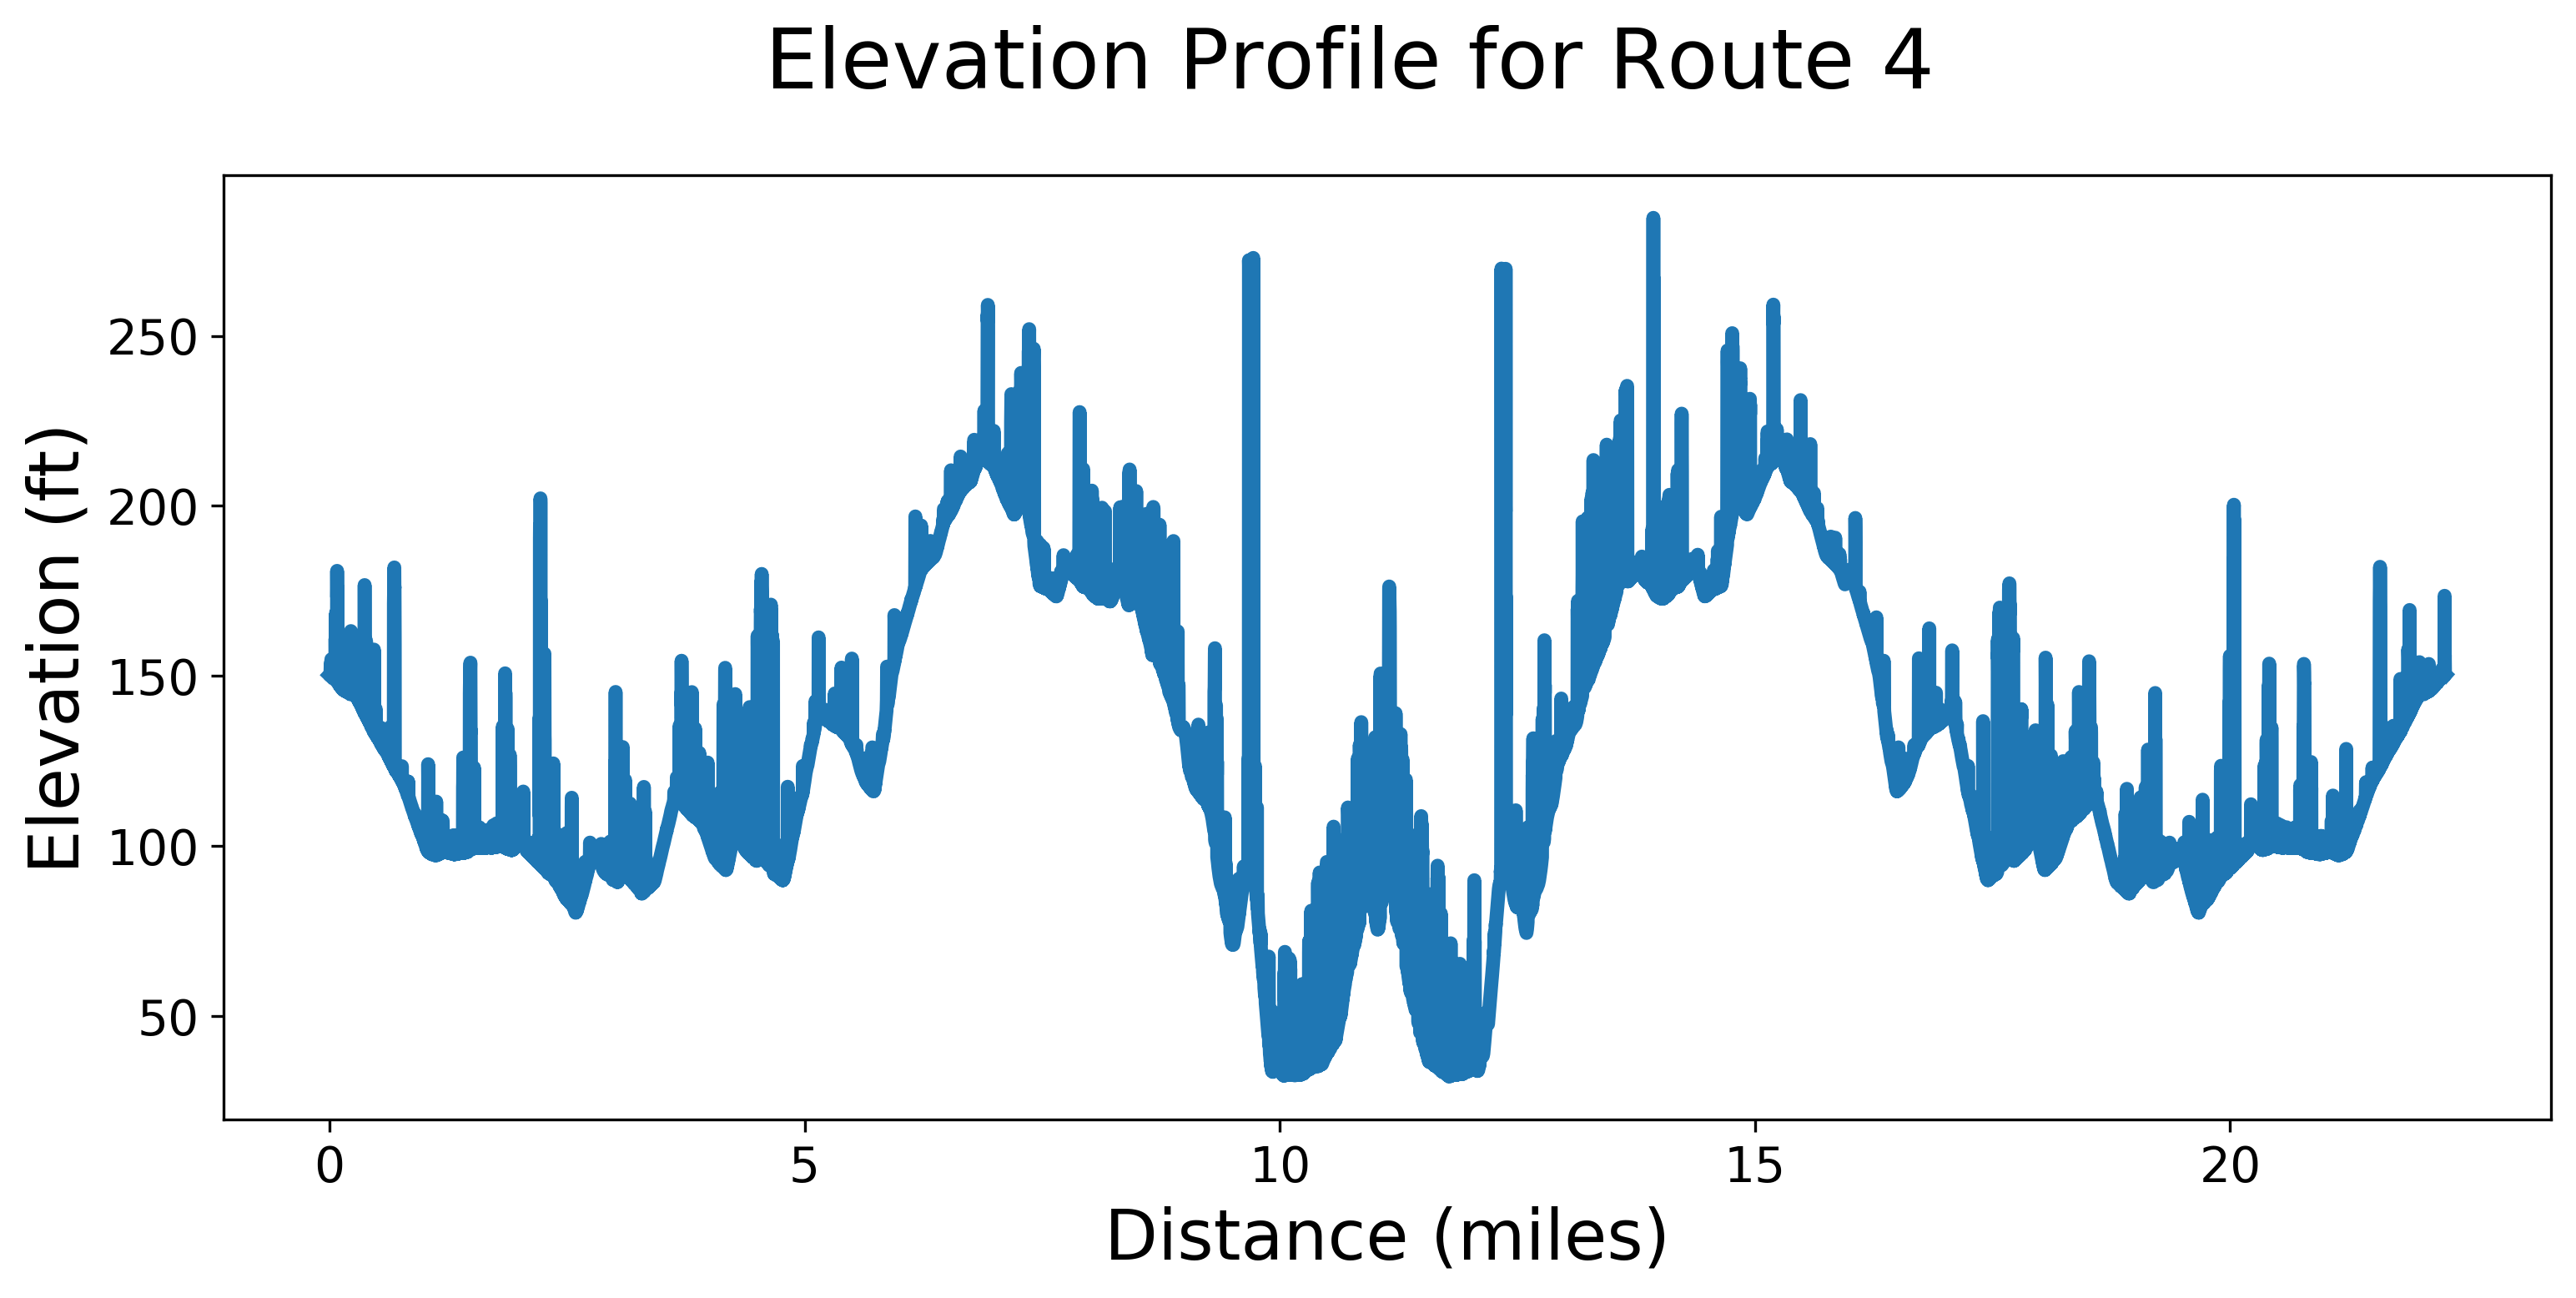

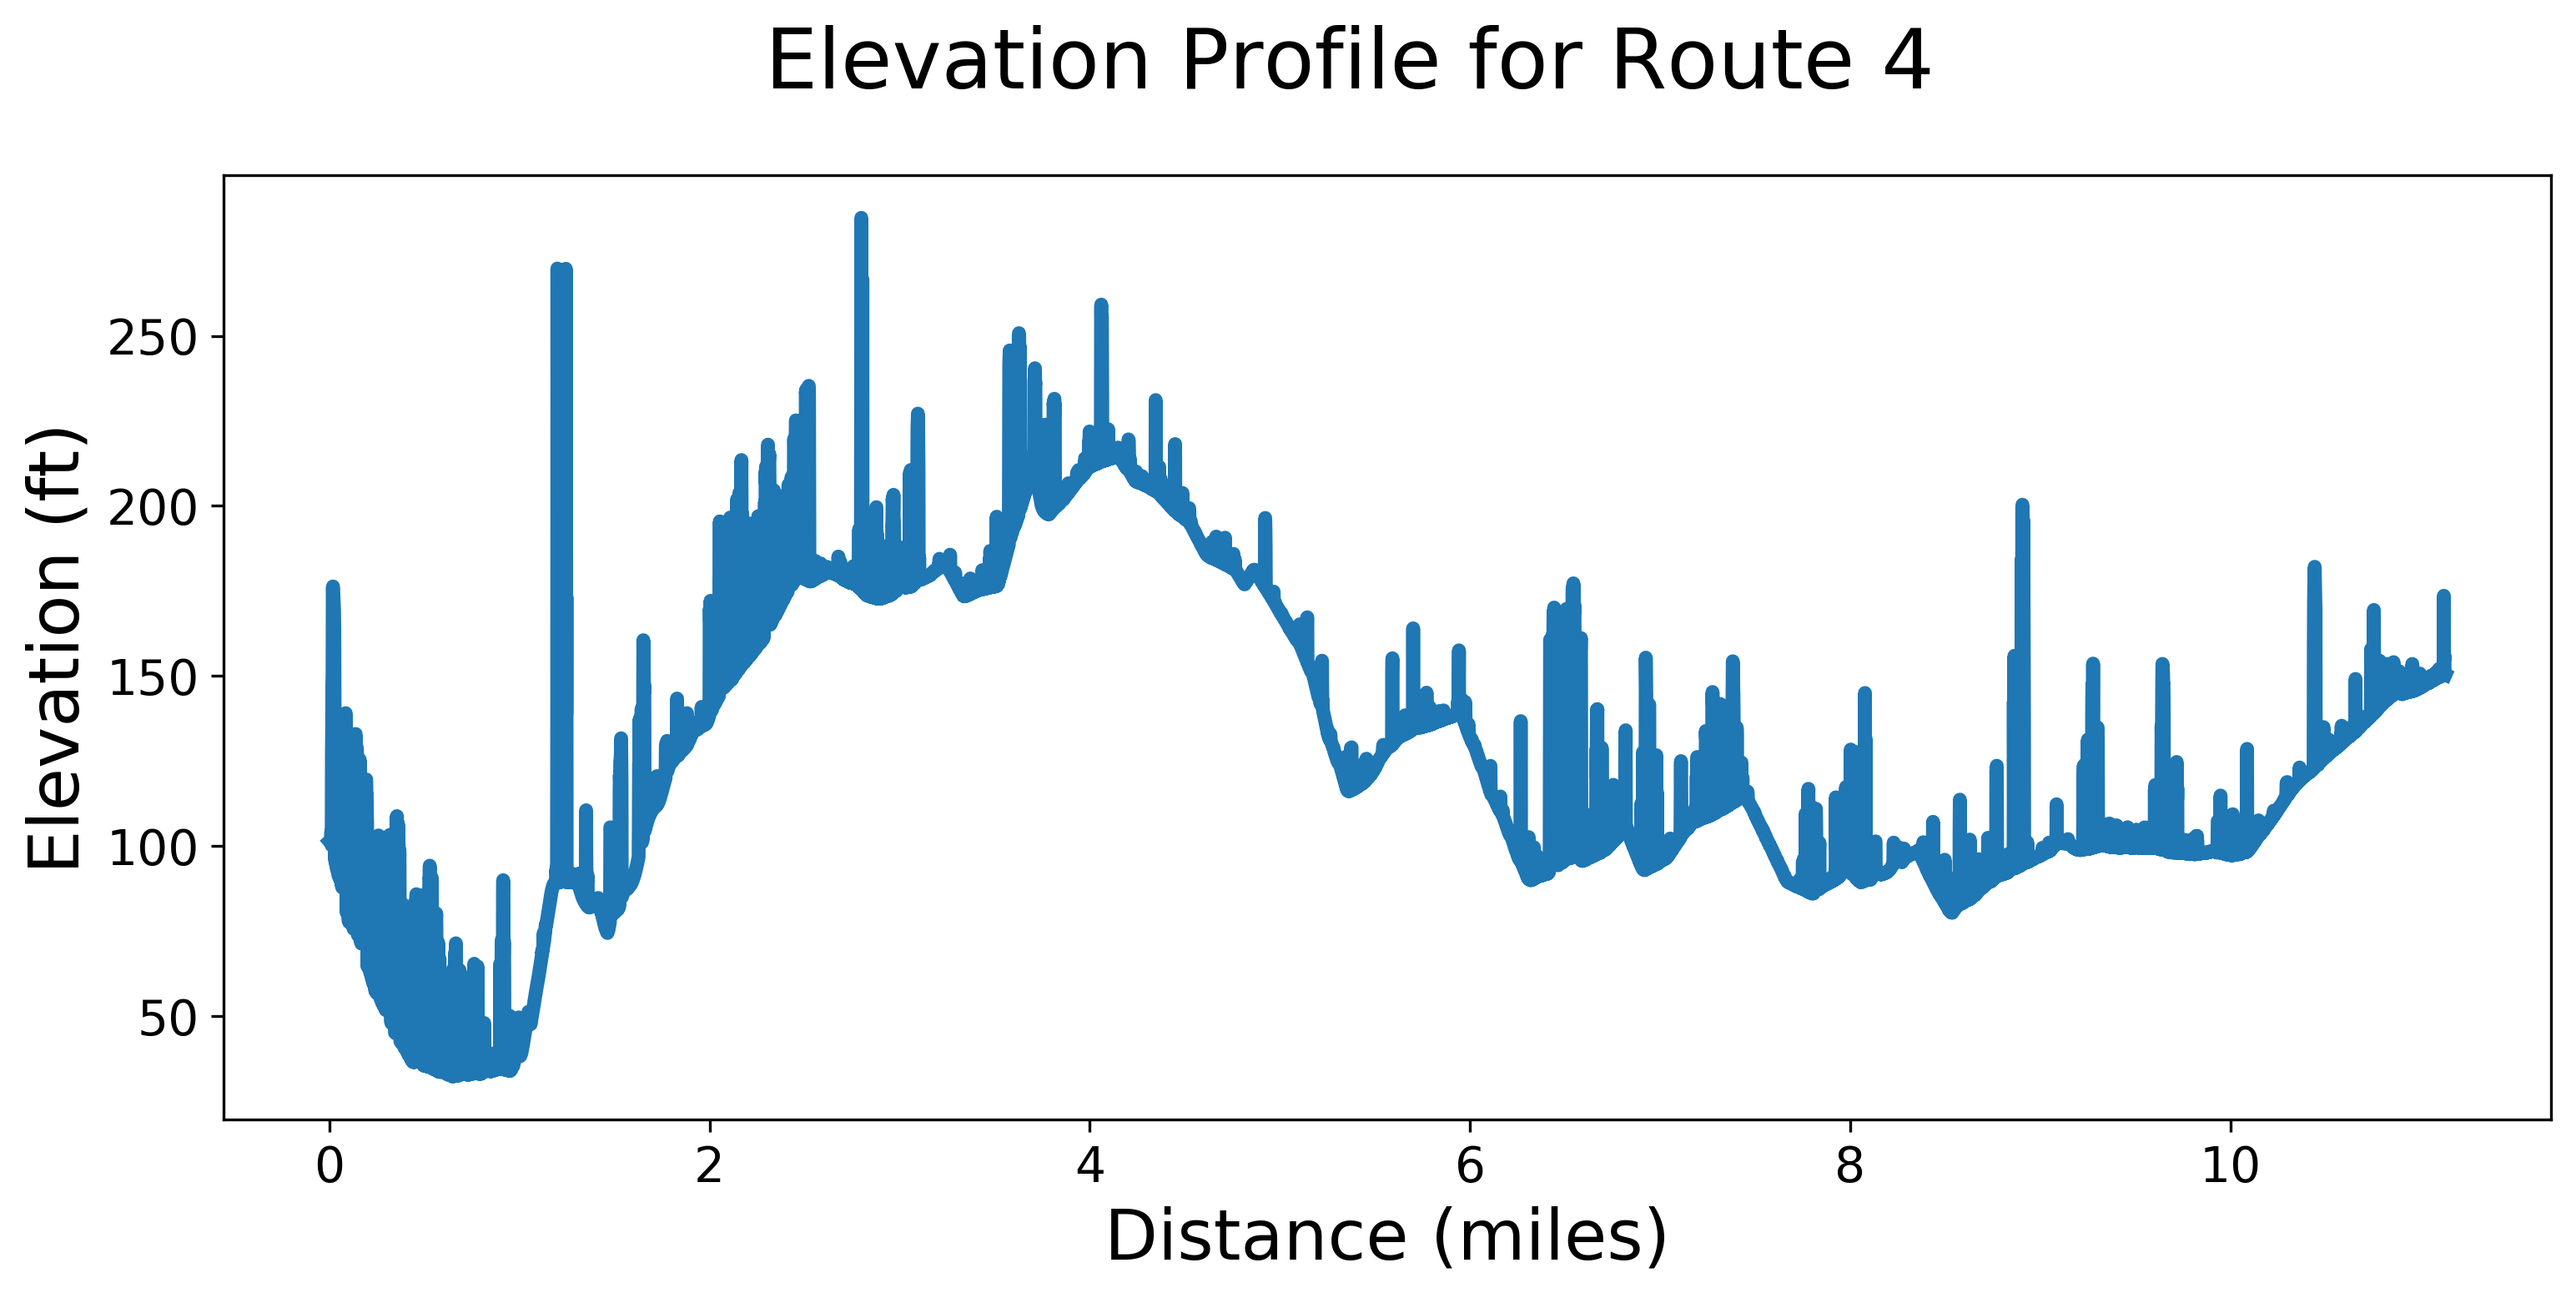

In [5]:
route_pts = '../data/pxd_rt4_pts.shp'

route = gpd.read_file(route_pts)


x = []

for i in route.index:
    
    x.append(i*6)
    

route['length'] = x
route.head(10)


vis.elev(route['Z'], route['length'], 4)
out_bound_raw, in_bound_raw = np.split(route['Z'].values, 2)
out_bound2, in_bound2 = np.split(route['length'].values, 2)
vis.elev(in_bound_raw, out_bound2, 4)

points = route[('Z')].values

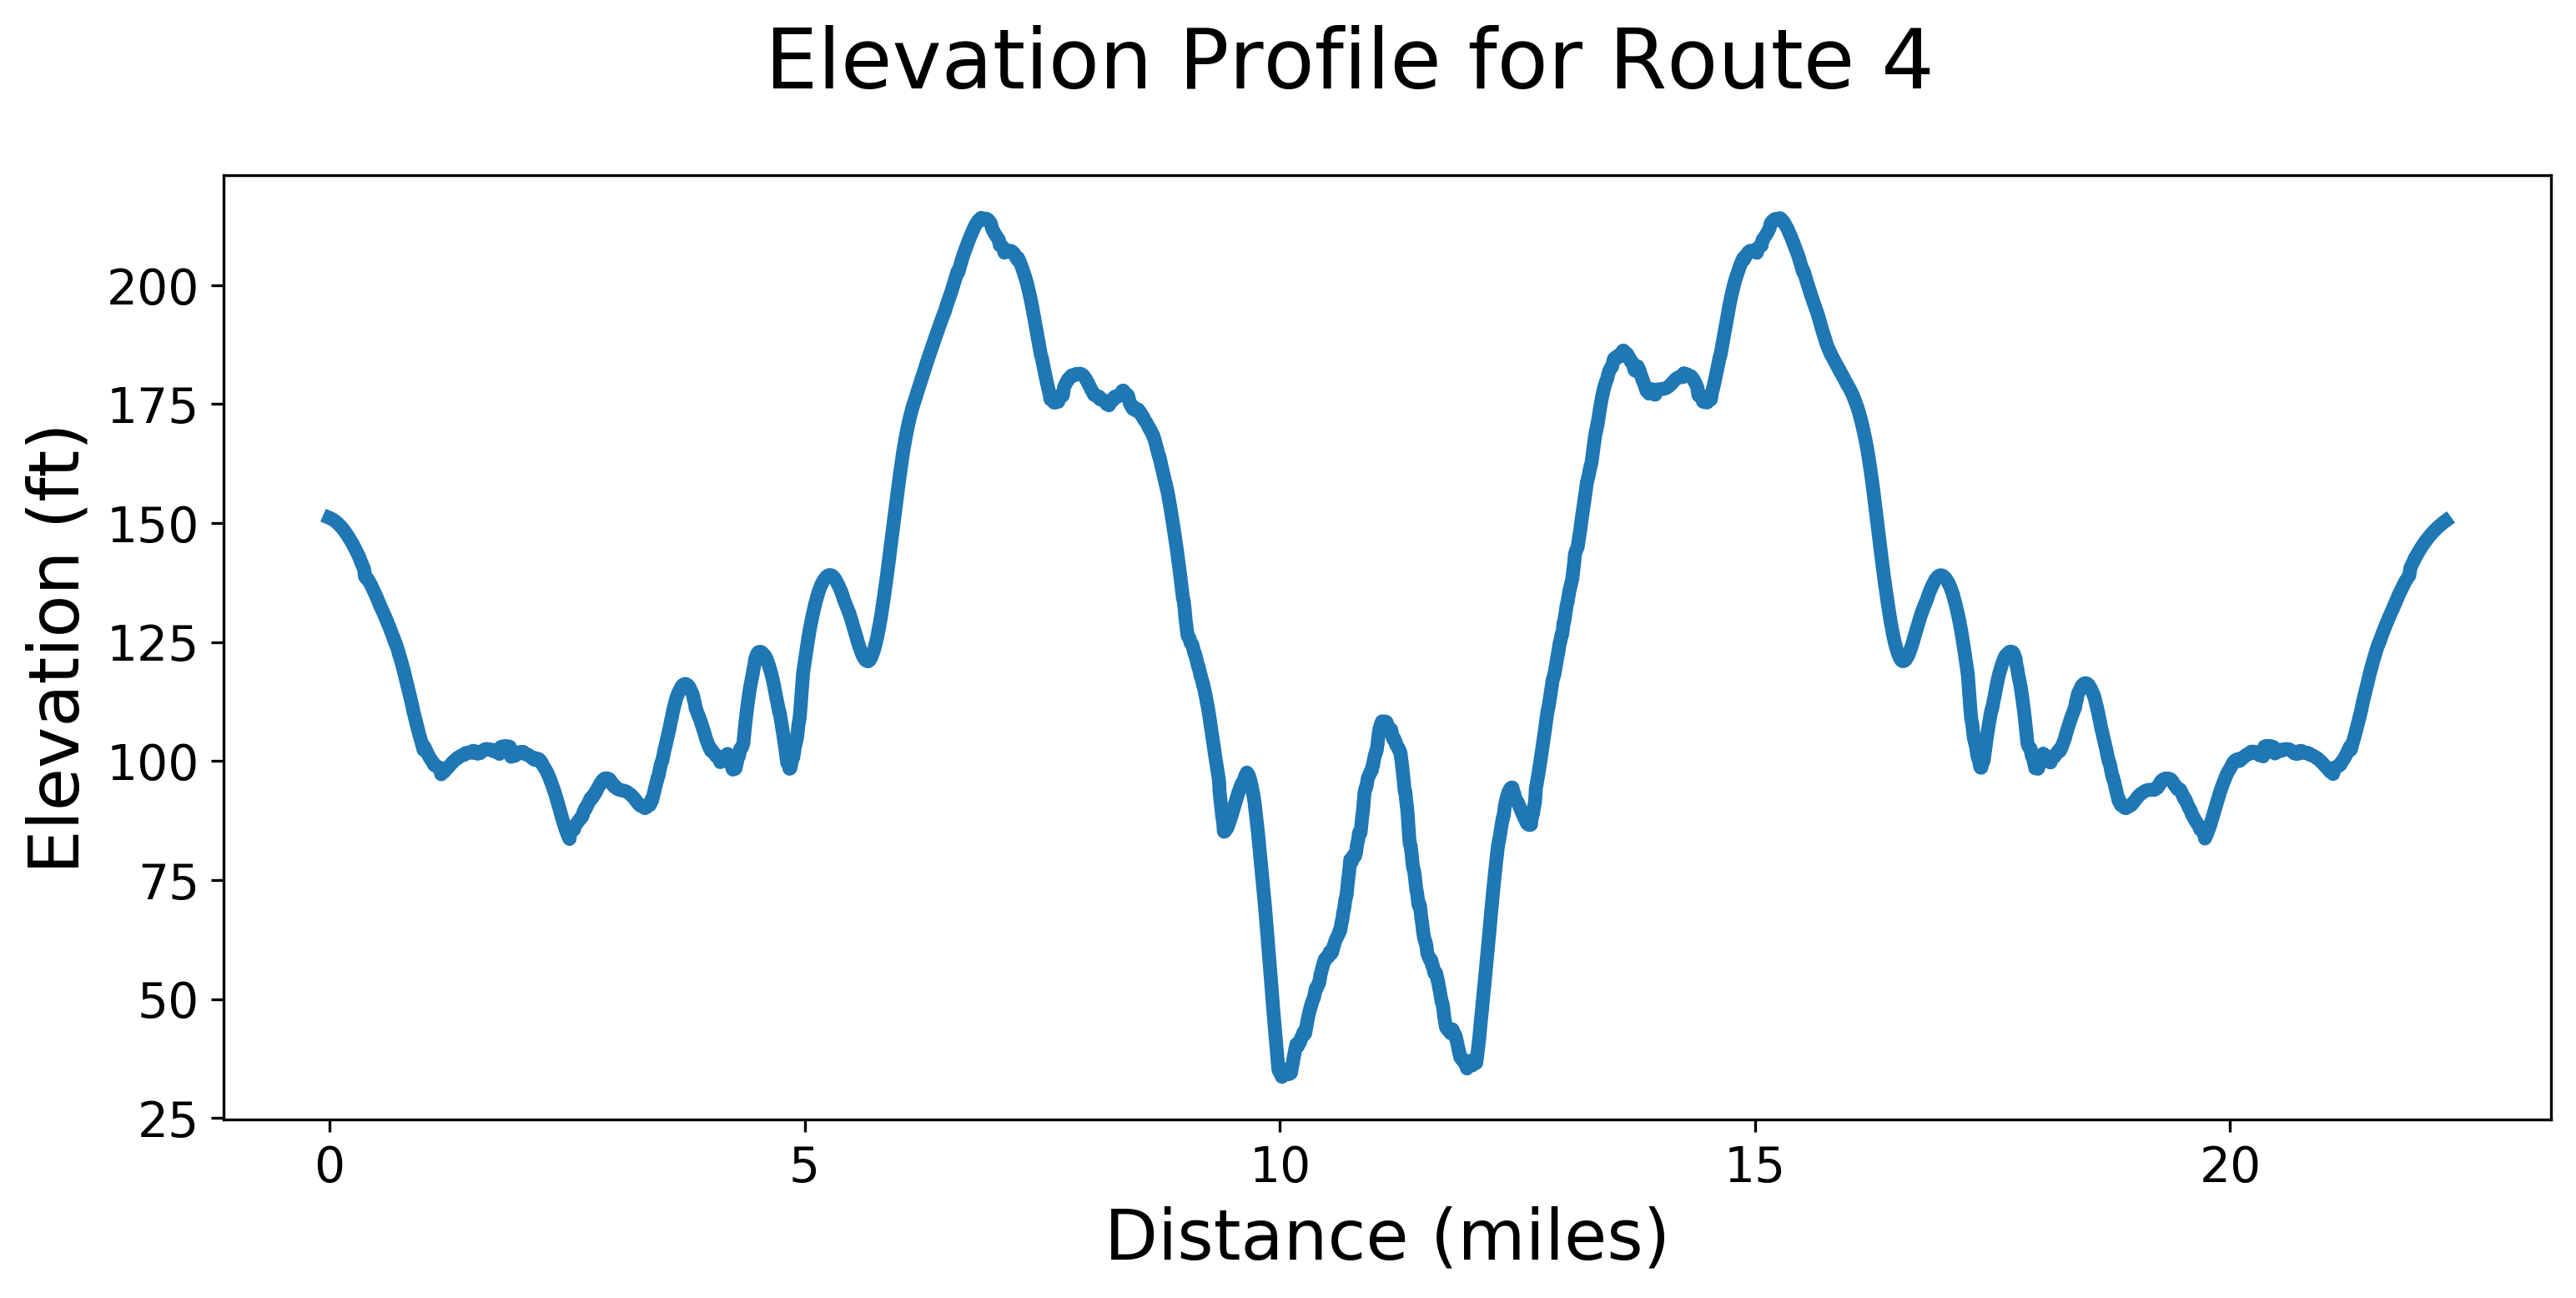

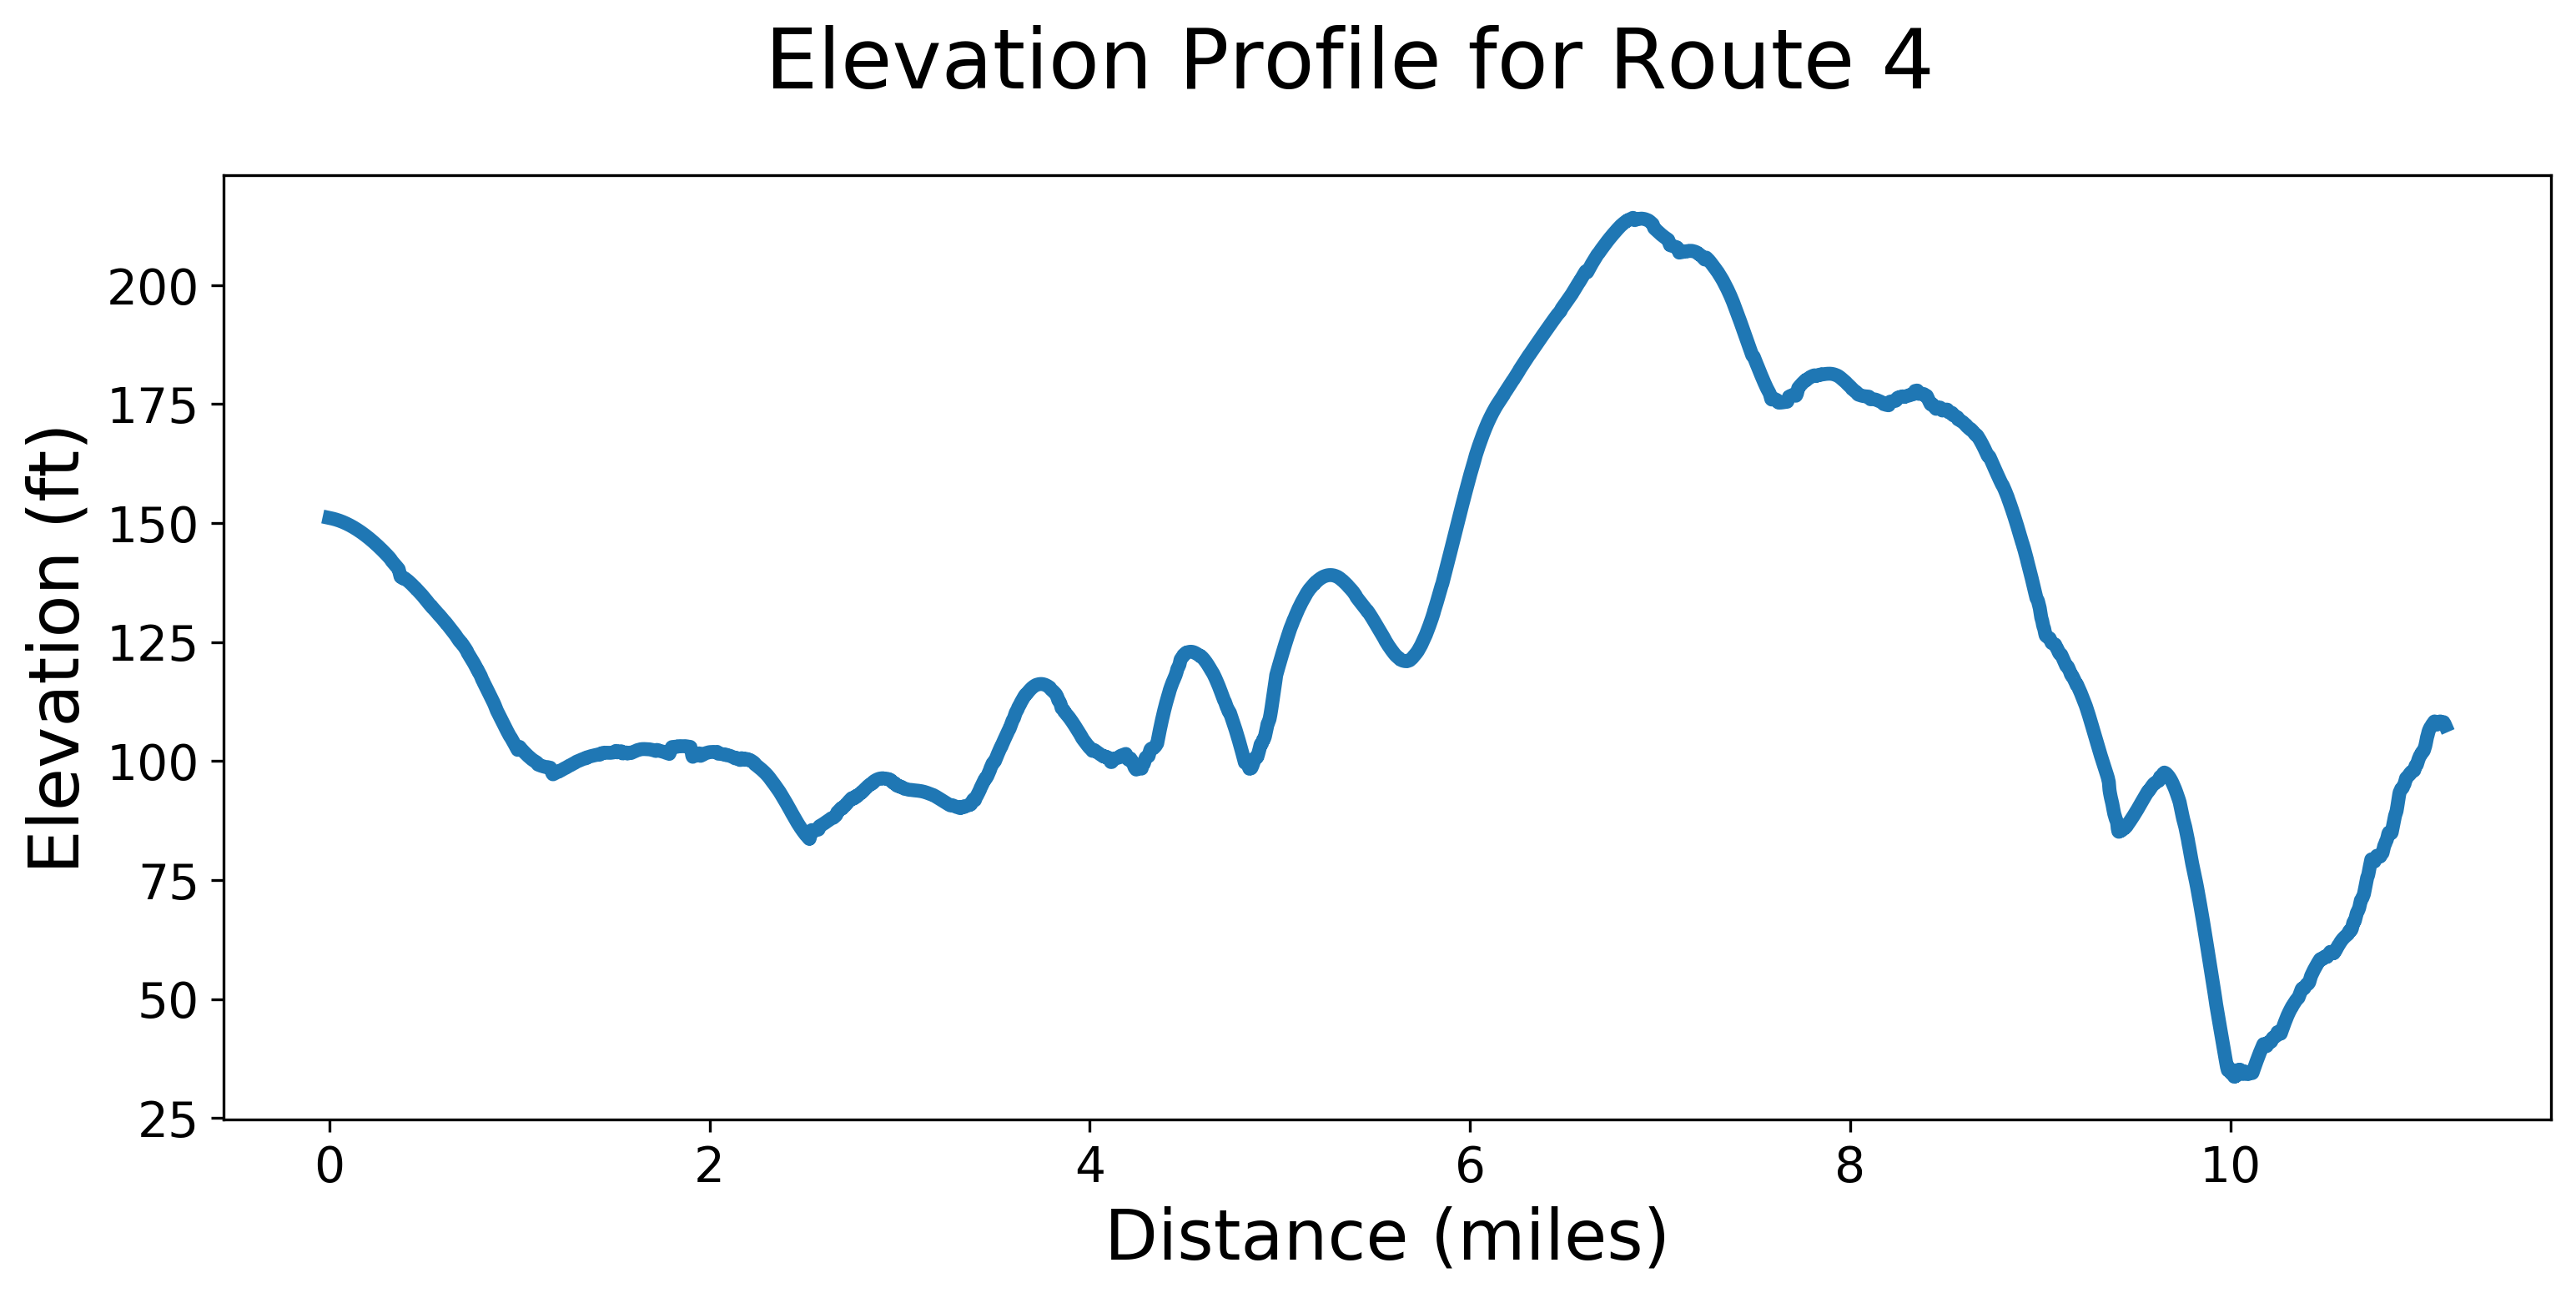

In [13]:
y_new = sf(points, 551, 3,  axis = 0) 
out_bound, in_bound = np.split(y_new, 2)
vis.elev(y_new, route['length'].values, 4)
vis.elev(out_bound, out_bound2, 4)

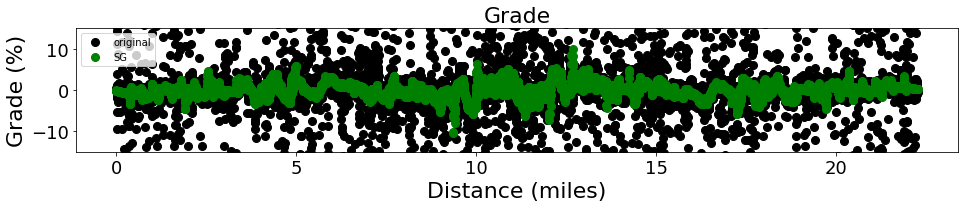

In [14]:
grade = [0]

for i in range(1,len(points)):
    grade.append((points[i]-points[i-1])/6)
    
route['grade']=grade
route.head(10)

grade_SG = [0]

for i in range(1,len(y_new)):
    grade_SG.append((y_new[i]-y_new[i-1])/6)
    
route['grade_SG']=grade_SG
route.head(20)

fig = plt.figure(figsize=(13.5,3))

ax1 = fig.add_subplot(111)
ax1.set_title('Grade',fontsize = 22)
ax1.plot((route['length'])/5280,route['grade']*100,'o',label='original',color = 'k',ms = 8)
ax1.plot((route['length'])/5280,route['grade_SG']*100,'o',label='SG',color = 'g',ms = 8)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xlabel("Distance (miles)",fontsize = 22)
ax1.set_ylabel("Grade (%)",fontsize = 22)
ax1.legend()
ax1.set_ylim(-15,15)
plt.tight_layout()

### Analysis of Route 4 PDX

Looking at the unfliltered data for Portland, we can see there is a lot of clustered data near the beginning. Since Portland is not as hilly as Seattle, I increased the window length to reflect this. Increasing the window length will help smooth out some of the curves like the ones near 2 miles.

### Next Steps

By looking at the elevation profile and grade plot with and without the filter, we get to understand how the filter works. The next step of the project is to impliment the filter into the package that calculates the load of the battery.